
# Read Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dense, Flatten, Dropout
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt






In [2]:
#Read CSV
# df= pd.read_csv('/Users/meghnaroy/Library/CloudStorage/OneDrive-purdue.edu/Research/MentalHealth/MOBISOFT/data_with_exclusion.csv')
ema = pd.read_csv('/Users/meghnaroy/Library/CloudStorage/OneDrive-purdue.edu/Research/MentalHealth/CHASE/archive/EMA/general_ema.csv')

df = pd.read_csv('/Users/meghnaroy/Library/CloudStorage/OneDrive-purdue.edu/Research/MentalHealth/CHASE/archive/Sensing/sensing.csv')
# ema = pd.read_csv('/Users/meghnaroy/Library/CloudStorage/OneDrive-purdue.edu/Research/MentalHealth/CHASE/archive/EMA/general_ema.csv')
# merged = pd.merge(df, ema, on=['uid', 'day'], how='inner')


In [3]:
# merged = pd.merge(df, ema, on=['uid', 'day'], how='inner')

merged = pd.merge(df, ema, on=['uid', 'day'], how='inner')
merged= merged.dropna(subset=['phq4_score']).copy()

In [4]:
merged

,uid,is_ios,day,act_in_vehicle_ep_0,act_in_vehicle_ep_1,act_in_vehicle_ep_2,act_in_vehicle_ep_3,act_in_vehicle_hr_0,act_in_vehicle_hr_1,act_in_vehicle_hr_10,...,phq4_score,social_level,sse3-1,sse3-2,sse3-3,sse3-4,sse3_resp_mean,sse3_resp_median,stress,avg_ema_spent_time
0,1ff6d7f34acb354430e7323a35ff7703,1,20170907,0,0,0,0,0,0,0,...,7.0,4.0,1.0,3.0,3.0,3.0,2.995924,2.989184,1.0,37.385698
1,1ff6d7f34acb354430e7323a35ff7703,1,20170908,0,0,0,0,0,0,0,...,4.0,2.0,2.0,3.0,3.0,3.0,6.340799,6.720536,4.0,52.117245
4,1ff6d7f34acb354430e7323a35ff7703,1,20170911,0,0,0,0,0,0,0,...,4.0,3.0,1.0,2.0,2.0,3.0,2.350849,2.317872,4.0,1351.983871
10,1ff6d7f34acb354430e7323a35ff7703,1,20170917,0,0,0,0,0,0,0,...,4.0,2.0,1.0,3.0,3.0,3.0,10.028819,9.687727,2.0,87.877848
19,1ff6d7f34acb354430e7323a35ff7703,1,20170926,0,0,0,0,0,0,0,...,4.0,2.0,1.0,2.0,2.0,2.0,2.414406,2.539411,5.0,26.443065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216024,6b0083d00297f9c03e00b2cde889b666,1,20201009,0,0,0,0,0,0,0,...,2.0,2.0,2.0,2.0,3.0,4.0,1.693761,1.571577,3.0,19.081095
216033,6b0083d00297f9c03e00b2cde889b666,1,20201018,0,0,0,0,0,0,0,...,2.0,4.0,3.0,4.0,3.0,4.0,1.435970,1.450523,3.0,14.572766
216038,6b0083d00297f9c03e00b2cde889b666,1,20201023,227,0,0,227,0,0,0,...,1.0,3.0,2.0,4.0,4.0,4.0,1.656038,1.484817,3.0,15.143021
216045,6b0083d00297f9c03e00b2cde889b666,1,20201030,0,0,0,0,0,0,0,...,2.0,2.0,2.0,4.0,3.0,3.0,1.279656,1.249394,3.0,32.220780


In [5]:
#Defone PHQ4 category
def categorize_phq4(score):
    if 0 <= score <= 2:
        return 0 #NORMAL
    elif 3 <= score <= 5:
        return 1 # MILD
    elif 6 <= score <= 8:
        return 2 #MOD
    elif 9 <= score <= 12:
        return 3 #SEVERE
    else:
        return 'Unknown'

# Add a new column for PHQ4 category
merged['phq4_category'] = merged['phq4_score'].apply(categorize_phq4)

In [6]:
#Read Labeled data (manually generated labels)
df1 =  pd.read_csv('/Users/meghnaroy/Library/CloudStorage/OneDrive-purdue.edu/Research/MentalHealth/CHASE/CODE/CHASE_Labeled.csv')

In [7]:
df1

,Variable,Description,"Relevant Labels\n[0: Leisure, 1: MeTime, 2: Phone, 3: Sleep , 4: SocialInt]",Labels,Leisure,Me Time,Phone,Sleep,Social Interaction
0,uid,Unique user ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,is_ios,Boolean indicating whether the user is an iOS ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,day,Date in the format YYYYMMDD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,act_on_bike_ep_0,Activity duration on bike,\n2. Leisure\n3. Me Time,"[0,1]",NaN,NaN,NaN,NaN,NaN
4,act_on_foot_ep_0,Activity duration on foot,\n2. Leisure\n3. Me Time,"[0,1,4]",NaN,NaN,NaN,NaN,NaN
5,act_running_ep_0,Activity duration running,\n2. Leisure\n3. Me Time,"[0,1]",NaN,NaN,NaN,NaN,NaN
6,act_still_ep_0,Activity duration still (no movement),1. Me Time \n2. Sleep Time,"[1,3]",NaN,NaN,NaN,NaN,NaN
7,act_walking_ep_0,Activity duration walking,\n2. Leisure\n3. Me Time,"[0,1,4]",NaN,NaN,NaN,NaN,NaN
8,audio_convo_duration_ep_0,Duration of detected conversations,1. Social Interaction\n2. Leisure\n3. Phone,"[0,2,4]",NaN,NaN,NaN,NaN,NaN
9,(call_in_num_ep_0+call_out_num_ep_0) /(call_in...,No of inc calls/Duration of incoming call,1. Phone Time.\nLeisure,"[0,2]",NaN,NaN,NaN,NaN,NaN


In [8]:

#EXTRACT FEATURES PER LABEL FROM CSV
features_leisure = []
features_me = []
features_phone = []
features_sleep = []
features_social = []

# Iterate through each row to categorize based on Labels
for _, row in df1.iterrows():
    labels = row['Labels']  # Extract Labels
    variable = row['Variable']  # Extract corresponding Variable
    
    # Ensure labels is parsed correctly
    if isinstance(labels, str):
        labels = eval(labels)  # Convert string representation to a list
    
    # Check and append to the respective lists
    if isinstance(labels, list):  
        if 0 in labels:
            features_leisure.append(variable)
        if 1 in labels:
            features_me.append(variable)
        if 2 in labels:
            features_phone.append(variable)
        if 3 in labels:
            features_sleep.append(variable)
        if 4 in labels:
            features_social.append(variable)




In [9]:
# New df with appropriate columns

data=merged[['uid',
 'is_ios',
 'day',
 'act_on_bike_ep_0',
 'act_on_foot_ep_0',
 'act_running_ep_0',
 'act_still_ep_0',
 'act_walking_ep_0',
 'audio_convo_duration_ep_0',
 'call_in_num_ep_0', 'call_out_num_ep_0','call_in_duration_ep_0','call_out_duration_ep_0',
 'loc_food_audio_voice',
 'loc_home_audio_voice',
 'loc_social_audio_voice',
 'loc_other_dorm_audio_voice',
 'loc_self_dorm_audio_voice',
 'loc_study_audio_voice',
 'loc_food_convo_duration',
 'loc_home_convo_duration',
 'loc_other_dorm_convo_duration',
 'loc_social_convo_duration',
 'loc_study_convo_duration',
 'loc_self_dorm_convo_duration',
 'loc_home_dur',
 'loc_leisure_dur',
 'loc_other_dorm_dur',
 'loc_self_dorm_dur',
 'loc_social_dur',
 'loc_study_dur',
 'loc_workout_dur',
 'loc_home_unlock_num','loc_home_unlock_duration',
 'loc_other_dorm_unlock_num','loc_other_dorm_unlock_duration',
 'loc_self_dorm_unlock_num', 'loc_self_dorm_unlock_duration',
 'loc_social_unlock_num','loc_social_unlock_duration',
 'loc_study_unlock_num','loc_study_unlock_duration',
 'sleep_duration',
 'sleep_end','sleep_start',
 'unlock_num_ep_0', 'unlock_duration_ep_0',
 'sleep_heathkit_dur','phq4_category']]


In [10]:
#Ensure no null values
nan_counts = data.isna().sum()
print(nan_counts)

data=data.fillna(0).copy()

nan_counts = data.isna().sum()
print(nan_counts)

uid                                   0
is_ios                                0
day                                   0
act_on_bike_ep_0                      0
act_on_foot_ep_0                  28033
act_running_ep_0                      0
act_still_ep_0                        0
act_walking_ep_0                      0
audio_convo_duration_ep_0             0
call_in_num_ep_0                  28033
call_out_num_ep_0                 28033
call_in_duration_ep_0             28033
call_out_duration_ep_0            28033
loc_food_audio_voice              25524
loc_home_audio_voice              11170
loc_social_audio_voice            30740
loc_other_dorm_audio_voice        29488
loc_self_dorm_audio_voice         23165
loc_study_audio_voice             24636
loc_food_convo_duration           25524
loc_home_convo_duration           11170
loc_other_dorm_convo_duration     29488
loc_social_convo_duration         30740
loc_study_convo_duration          24636
loc_self_dorm_convo_duration      23165


In [11]:
#Ensure dataframe has all required columns

cols= df1['Variable'].to_list()

for c in cols:
    if '/' in c or '-' in c:
        print(c)



# Create new columns in the DataFrame based on the given calculations
import numpy as np

# Helper function to safely perform division
def safe_division(numerator, denominator):
    return numerator / denominator if denominator != 0 else 0

# Adding new calculated columns
data['(call_in_num_ep_0+call_out_num_ep_0) /(call_in_duration_ep_0+call_out_duration_ep_0)'] = data.apply(
    lambda row: safe_division(
        row.get('call_in_num_ep_0', 0) + row.get('call_out_num_ep_0', 0),
        row.get('call_in_duration_ep_0', 0) + row.get('call_out_duration_ep_0', 0)
    ), axis=1
)

data['loc_home_unlock_num/loc_home_unlock_duration'] = data.apply(
    lambda row: safe_division(
        row.get('loc_home_unlock_num', 0),
        row.get('loc_home_unlock_duration', 0)
    ), axis=1
)

data['loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration'] = data.apply(
    lambda row: safe_division(
        row.get('loc_other_dorm_unlock_num', 0),
        row.get('loc_other_dorm_unlock_duration', 0)
    ), axis=1
)

data['loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration'] = data.apply(
    lambda row: safe_division(
        row.get('loc_self_dorm_unlock_num', 0),
        row.get('loc_self_dorm_unlock_duration', 0)
    ), axis=1
)

data['loc_social_unlock_num/ loc_social_unlock_duration'] = data.apply(
    lambda row: safe_division(
        row.get('loc_social_unlock_num', 0),
        row.get('loc_social_unlock_duration', 0)
    ), axis=1
)

data['loc_study_unlock_num/loc_study_unlock_duration'] = data.apply(
    lambda row: safe_division(
        row.get('loc_study_unlock_num', 0),
        row.get('loc_study_unlock_duration', 0)
    ), axis=1
)

data['sleep_end - sleep_start'] = data.apply(
    lambda row: row.get('sleep_end', np.nan) - row.get('sleep_start', np.nan),
    axis=1
)

data['unlock_num_ep_0/ unlock_duration_ep_0'] = data.apply(
    lambda row: safe_division(
        row.get('unlock_num_ep_0', 0),
        row.get('unlock_duration_ep_0', 0)
    ), axis=1
)



(call_in_num_ep_0+call_out_num_ep_0) /(call_in_duration_ep_0+call_out_duration_ep_0)
loc_home_unlock_num/loc_home_unlock_duration
loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration
loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration
loc_social_unlock_num/ loc_social_unlock_duration
loc_study_unlock_num/loc_study_unlock_duration
sleep_end - sleep_start
unlock_num_ep_0/ unlock_duration_ep_0


In [12]:
nan_counts = data.isna().sum()
nan_counts

uid                                                                                     0
is_ios                                                                                  0
day                                                                                     0
act_on_bike_ep_0                                                                        0
act_on_foot_ep_0                                                                        0
act_running_ep_0                                                                        0
act_still_ep_0                                                                          0
act_walking_ep_0                                                                        0
audio_convo_duration_ep_0                                                               0
call_in_num_ep_0                                                                        0
call_out_num_ep_0                                                                       0
call_in_du

In [13]:
data=data.fillna(0).copy()
data

,uid,is_ios,day,act_on_bike_ep_0,act_on_foot_ep_0,act_running_ep_0,act_still_ep_0,act_walking_ep_0,audio_convo_duration_ep_0,call_in_num_ep_0,...,sleep_heathkit_dur,phq4_category,(call_in_num_ep_0+call_out_num_ep_0) /(call_in_duration_ep_0+call_out_duration_ep_0),loc_home_unlock_num/loc_home_unlock_duration,loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration,loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration,loc_social_unlock_num/ loc_social_unlock_duration,loc_study_unlock_num/loc_study_unlock_duration,sleep_end - sleep_start,unlock_num_ep_0/ unlock_duration_ep_0
0,1ff6d7f34acb354430e7323a35ff7703,1,20170907,0,0.0,7,72169,14223,4485.0,0.0,...,0.000,2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,80,0.012734
1,1ff6d7f34acb354430e7323a35ff7703,1,20170908,0,0.0,13,79532,6854,1600.0,0.0,...,8.267,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,80,0.009665
4,1ff6d7f34acb354430e7323a35ff7703,1,20170911,0,0.0,5,79730,6664,1520.0,0.0,...,8.683,1,0.0,0.457027,0.000000,0.457027,0.000000,1.376451,74,0.010696
10,1ff6d7f34acb354430e7323a35ff7703,1,20170917,0,0.0,2,80442,5955,550.0,0.0,...,8.150,1,0.0,0.576619,0.000000,0.576619,0.000000,0.000000,66,0.010701
19,1ff6d7f34acb354430e7323a35ff7703,1,20170926,0,0.0,8,81686,4705,618.0,0.0,...,8.967,1,0.0,0.551252,0.378203,0.551252,0.000000,0.463510,70,0.009566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216024,6b0083d00297f9c03e00b2cde889b666,1,20201009,0,0.0,426,60534,25439,0.0,0.0,...,7.217,0,0.0,0.572248,2.202799,0.572248,0.000000,0.000000,60,0.015106
216033,6b0083d00297f9c03e00b2cde889b666,1,20201018,0,0.0,11,71389,14999,0.0,0.0,...,6.017,0,0.0,0.573726,0.000000,0.573726,0.000000,0.956318,56,0.013715
216038,6b0083d00297f9c03e00b2cde889b666,1,20201023,0,0.0,111,68992,17069,0.0,0.0,...,0.150,0,0.0,0.344449,1.544171,0.344449,1.544171,0.805250,60,0.014716
216045,6b0083d00297f9c03e00b2cde889b666,1,20201030,0,0.0,22,75031,11346,0.0,0.0,...,0.000,0,0.0,0.575672,1.315964,0.575672,0.000000,0.976428,46,0.015091


In [14]:
nan_counts = data.isna().sum()
nan_counts

uid                                                                                     0
is_ios                                                                                  0
day                                                                                     0
act_on_bike_ep_0                                                                        0
act_on_foot_ep_0                                                                        0
act_running_ep_0                                                                        0
act_still_ep_0                                                                          0
act_walking_ep_0                                                                        0
audio_convo_duration_ep_0                                                               0
call_in_num_ep_0                                                                        0
call_out_num_ep_0                                                                       0
call_in_du

In [15]:
cols= df1['Variable'].to_list()

for c in cols:
    if '/' in c or '-' in c:
        print(c)

(call_in_num_ep_0+call_out_num_ep_0) /(call_in_duration_ep_0+call_out_duration_ep_0)
loc_home_unlock_num/loc_home_unlock_duration
loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration
loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration
loc_social_unlock_num/ loc_social_unlock_duration
loc_study_unlock_num/loc_study_unlock_duration
sleep_end - sleep_start
unlock_num_ep_0/ unlock_duration_ep_0


In [16]:
# Create new columns in the DataFrame based on the given calculations
import numpy as np

# Helper function to safely perform division
def safe_division(numerator, denominator):
    return numerator / denominator if denominator != 0 else 0

# Adding new calculated columns
data['(call_in_num_ep_0+call_out_num_ep_0) /(call_in_duration_ep_0+call_out_duration_ep_0)'] = data.apply(
    lambda row: safe_division(
        row.get('call_in_num_ep_0', 0) + row.get('call_out_num_ep_0', 0),
        row.get('call_in_duration_ep_0', 0) + row.get('call_out_duration_ep_0', 0)
    ), axis=1
)

data['loc_home_unlock_num/loc_home_unlock_duration'] = data.apply(
    lambda row: safe_division(
        row.get('loc_home_unlock_num', 0),
        row.get('loc_home_unlock_duration', 0)
    ), axis=1
)

data['loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration'] = data.apply(
    lambda row: safe_division(
        row.get('loc_other_dorm_unlock_num', 0),
        row.get('loc_other_dorm_unlock_duration', 0)
    ), axis=1
)

data['loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration'] = data.apply(
    lambda row: safe_division(
        row.get('loc_self_dorm_unlock_num', 0),
        row.get('loc_self_dorm_unlock_duration', 0)
    ), axis=1
)

data['loc_social_unlock_num/ loc_social_unlock_duration'] = data.apply(
    lambda row: safe_division(
        row.get('loc_social_unlock_num', 0),
        row.get('loc_social_unlock_duration', 0)
    ), axis=1
)

data['loc_study_unlock_num/loc_study_unlock_duration'] = data.apply(
    lambda row: safe_division(
        row.get('loc_study_unlock_num', 0),
        row.get('loc_study_unlock_duration', 0)
    ), axis=1
)

data['sleep_end - sleep_start'] = data.apply(
    lambda row: row.get('sleep_end', np.nan) - row.get('sleep_start', np.nan),
    axis=1
)

data['unlock_num_ep_0/ unlock_duration_ep_0'] = data.apply(
    lambda row: safe_division(
        row.get('unlock_num_ep_0', 0),
        row.get('unlock_duration_ep_0', 0)
    ), axis=1
)



In [17]:
data

,uid,is_ios,day,act_on_bike_ep_0,act_on_foot_ep_0,act_running_ep_0,act_still_ep_0,act_walking_ep_0,audio_convo_duration_ep_0,call_in_num_ep_0,...,sleep_heathkit_dur,phq4_category,(call_in_num_ep_0+call_out_num_ep_0) /(call_in_duration_ep_0+call_out_duration_ep_0),loc_home_unlock_num/loc_home_unlock_duration,loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration,loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration,loc_social_unlock_num/ loc_social_unlock_duration,loc_study_unlock_num/loc_study_unlock_duration,sleep_end - sleep_start,unlock_num_ep_0/ unlock_duration_ep_0
0,1ff6d7f34acb354430e7323a35ff7703,1,20170907,0,0.0,7,72169,14223,4485.0,0.0,...,0.000,2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,80,0.012734
1,1ff6d7f34acb354430e7323a35ff7703,1,20170908,0,0.0,13,79532,6854,1600.0,0.0,...,8.267,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,80,0.009665
4,1ff6d7f34acb354430e7323a35ff7703,1,20170911,0,0.0,5,79730,6664,1520.0,0.0,...,8.683,1,0.0,0.457027,0.000000,0.457027,0.000000,1.376451,74,0.010696
10,1ff6d7f34acb354430e7323a35ff7703,1,20170917,0,0.0,2,80442,5955,550.0,0.0,...,8.150,1,0.0,0.576619,0.000000,0.576619,0.000000,0.000000,66,0.010701
19,1ff6d7f34acb354430e7323a35ff7703,1,20170926,0,0.0,8,81686,4705,618.0,0.0,...,8.967,1,0.0,0.551252,0.378203,0.551252,0.000000,0.463510,70,0.009566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216024,6b0083d00297f9c03e00b2cde889b666,1,20201009,0,0.0,426,60534,25439,0.0,0.0,...,7.217,0,0.0,0.572248,2.202799,0.572248,0.000000,0.000000,60,0.015106
216033,6b0083d00297f9c03e00b2cde889b666,1,20201018,0,0.0,11,71389,14999,0.0,0.0,...,6.017,0,0.0,0.573726,0.000000,0.573726,0.000000,0.956318,56,0.013715
216038,6b0083d00297f9c03e00b2cde889b666,1,20201023,0,0.0,111,68992,17069,0.0,0.0,...,0.150,0,0.0,0.344449,1.544171,0.344449,1.544171,0.805250,60,0.014716
216045,6b0083d00297f9c03e00b2cde889b666,1,20201030,0,0.0,22,75031,11346,0.0,0.0,...,0.000,0,0.0,0.575672,1.315964,0.575672,0.000000,0.976428,46,0.015091


# Feature imp ->Leisure

In [18]:
features_leisure

['act_on_bike_ep_0',
 'act_on_foot_ep_0',
 'act_running_ep_0',
 'act_walking_ep_0',
 'audio_convo_duration_ep_0',
 '(call_in_num_ep_0+call_out_num_ep_0) /(call_in_duration_ep_0+call_out_duration_ep_0)',
 'loc_social_audio_voice',
 'loc_other_dorm_audio_voice',
 'loc_other_dorm_convo_duration',
 'loc_social_convo_duration',
 'loc_leisure_dur',
 'loc_workout_dur',
 'loc_home_unlock_num/loc_home_unlock_duration',
 'loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration']

In [19]:
features_leisure.append('uid')

In [20]:
features_leisure

['act_on_bike_ep_0',
 'act_on_foot_ep_0',
 'act_running_ep_0',
 'act_walking_ep_0',
 'audio_convo_duration_ep_0',
 '(call_in_num_ep_0+call_out_num_ep_0) /(call_in_duration_ep_0+call_out_duration_ep_0)',
 'loc_social_audio_voice',
 'loc_other_dorm_audio_voice',
 'loc_other_dorm_convo_duration',
 'loc_social_convo_duration',
 'loc_leisure_dur',
 'loc_workout_dur',
 'loc_home_unlock_num/loc_home_unlock_duration',
 'loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration',
 'uid']

In [21]:
df_l= data[features_leisure]
df_l

,act_on_bike_ep_0,act_on_foot_ep_0,act_running_ep_0,act_walking_ep_0,audio_convo_duration_ep_0,(call_in_num_ep_0+call_out_num_ep_0) /(call_in_duration_ep_0+call_out_duration_ep_0),loc_social_audio_voice,loc_other_dorm_audio_voice,loc_other_dorm_convo_duration,loc_social_convo_duration,loc_leisure_dur,loc_workout_dur,loc_home_unlock_num/loc_home_unlock_duration,loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration,uid
0,0,0.0,7,14223,4485.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1ff6d7f34acb354430e7323a35ff7703
1,0,0.0,13,6854,1600.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1ff6d7f34acb354430e7323a35ff7703
4,0,0.0,5,6664,1520.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.457027,0.000000,1ff6d7f34acb354430e7323a35ff7703
10,0,0.0,2,5955,550.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.576619,0.000000,1ff6d7f34acb354430e7323a35ff7703
19,0,0.0,8,4705,618.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.551252,0.378203,1ff6d7f34acb354430e7323a35ff7703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216024,0,0.0,426,25439,0.0,0.0,0.0,0.0,0.0,0.0,2.333333,0.0,0.572248,2.202799,6b0083d00297f9c03e00b2cde889b666
216033,0,0.0,11,14999,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.573726,0.000000,6b0083d00297f9c03e00b2cde889b666
216038,0,0.0,111,17069,0.0,0.0,0.0,0.0,0.0,0.0,0.497500,0.0,0.344449,1.544171,6b0083d00297f9c03e00b2cde889b666
216045,0,0.0,22,11346,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.575672,1.315964,6b0083d00297f9c03e00b2cde889b666


In [22]:
features_leisure.remove('uid')

In [23]:
features_leisure

['act_on_bike_ep_0',
 'act_on_foot_ep_0',
 'act_running_ep_0',
 'act_walking_ep_0',
 'audio_convo_duration_ep_0',
 '(call_in_num_ep_0+call_out_num_ep_0) /(call_in_duration_ep_0+call_out_duration_ep_0)',
 'loc_social_audio_voice',
 'loc_other_dorm_audio_voice',
 'loc_other_dorm_convo_duration',
 'loc_social_convo_duration',
 'loc_leisure_dur',
 'loc_workout_dur',
 'loc_home_unlock_num/loc_home_unlock_duration',
 'loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration']

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_l[features_leisure])

# Apply clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster-based scores
df_l['cluster_score'] = clusters
df_l['leisure_score'] = scaled_features.sum(axis=1) + df_l['cluster_score']

/var/folders/8j/mm66f4_n1pl4smvt7jb0kpsm0000gn/T/ipykernel_91892/969092561.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l['cluster_score'] = clusters
/var/folders/8j/mm66f4_n1pl4smvt7jb0kpsm0000gn/T/ipykernel_91892/969092561.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l['leisure_score'] = scaled_features.sum(axis=1) + df_l['cluster_score']


In [25]:
df_l

,act_on_bike_ep_0,act_on_foot_ep_0,act_running_ep_0,act_walking_ep_0,audio_convo_duration_ep_0,(call_in_num_ep_0+call_out_num_ep_0) /(call_in_duration_ep_0+call_out_duration_ep_0),loc_social_audio_voice,loc_other_dorm_audio_voice,loc_other_dorm_convo_duration,loc_social_convo_duration,loc_leisure_dur,loc_workout_dur,loc_home_unlock_num/loc_home_unlock_duration,loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration,uid,cluster_score,leisure_score
0,0,0.0,7,14223,4485.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1ff6d7f34acb354430e7323a35ff7703,0,-1.105667
1,0,0.0,13,6854,1600.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1ff6d7f34acb354430e7323a35ff7703,0,-2.487194
4,0,0.0,5,6664,1520.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.457027,0.000000,1ff6d7f34acb354430e7323a35ff7703,0,-2.530850
10,0,0.0,2,5955,550.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.576619,0.000000,1ff6d7f34acb354430e7323a35ff7703,0,-2.761743
19,0,0.0,8,4705,618.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.551252,0.378203,1ff6d7f34acb354430e7323a35ff7703,0,-2.903209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216024,0,0.0,426,25439,0.0,0.0,0.0,0.0,0.0,0.0,2.333333,0.0,0.572248,2.202799,6b0083d00297f9c03e00b2cde889b666,0,3.355576
216033,0,0.0,11,14999,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.573726,0.000000,6b0083d00297f9c03e00b2cde889b666,0,-1.571728
216038,0,0.0,111,17069,0.0,0.0,0.0,0.0,0.0,0.0,0.497500,0.0,0.344449,1.544171,6b0083d00297f9c03e00b2cde889b666,0,-0.501204
216045,0,0.0,22,11346,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.575672,1.315964,6b0083d00297f9c03e00b2cde889b666,0,-2.022052


In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Define the columns and their respective conditions
features_leisure = [
    'act_on_bike_ep_0',
    'act_on_foot_ep_0',
    'act_running_ep_0',
    'act_walking_ep_0',
    'audio_convo_duration_ep_0',
    '(call_in_num_ep_0+call_out_num_ep_0) /(call_in_duration_ep_0+call_out_duration_ep_0)',
    'loc_social_audio_voice',
    'loc_other_dorm_audio_voice',
    'loc_other_dorm_convo_duration',
    'loc_social_convo_duration',
    'loc_leisure_dur',
    'loc_workout_dur',
    'loc_home_unlock_num/loc_home_unlock_duration',
    'loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration'
]

# Initialize a list to store feature importance data for all UIDs
final_feature_importances = []

# Group by 'uid'
for uid, group in df_l.groupby('uid'):
    print(f"Processing UID: {uid}, Rows in Group: {group.shape[0]}")
    
    # Standardize the features
    scaler = StandardScaler()
    group[features_leisure] = scaler.fit_transform(group[features_leisure])

    # Define the leisure_score calculation
    def calculate_leisure_score(row):
        score = 0
        for col in features_leisure:
            if row[col] > 0:  # Since standardized, compare to 0 (mean)
                score += 1
        return score

    # Apply the function to calculate leisure_score
    group['leisure_score'] = group.apply(calculate_leisure_score, axis=1)

    # Use a Random Forest model to assess feature importance
    X = group[features_leisure]
    y = group['leisure_score']

    # Train a model
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)

    # Extract feature importances and add UID
    importance_row = {feature: model.feature_importances_[idx] for idx, feature in enumerate(features_leisure)}
    importance_row['UID'] = uid

    # Append the row to the final list
    final_feature_importances.append(importance_row)

# Create a DataFrame with UIDs as rows and features as columns
final_feature_importances_df = pd.DataFrame(final_feature_importances)

# Verify the DataFrame has the correct number of rows
print(f"Total Unique UIDs Processed: {len(final_feature_importances_df['UID'].unique())}")
print(f"Shape of Feature Importance DataFrame: {final_feature_importances_df.shape}")



Processing UID: 003df5deff30e1e5a07b5d063fe85c3f, Rows in Group: 152
Processing UID: 0107c61e54459068bb83f6be2058d65d, Rows in Group: 190
Processing UID: 01fb41df0f6c2f69d65db5a38c600b4c, Rows in Group: 13
Processing UID: 031cf9537e5da78c5a69a10cba088c94, Rows in Group: 97
Processing UID: 03a0ce5623bfeb8aa3113605f7682215, Rows in Group: 180
Processing UID: 07eab8e219b6a4dcd45167dc216e1189, Rows in Group: 13
Processing UID: 0947cdc8e87a0a45a012aa387ccedbcd, Rows in Group: 186
Processing UID: 0ab7acb36e6c710a7733c1c24e566bb3, Rows in Group: 180
Processing UID: 0aee9faa6f2d2d24d85d2690f5b2df25, Rows in Group: 85
Processing UID: 0b9c2303bcc61063f9a5653d77c90501, Rows in Group: 74
Processing UID: 0ba15aa0582c5e825710d42fe3eb231d, Rows in Group: 208
Processing UID: 0f2be96bde481cd3898f147a995a7d56, Rows in Group: 124
Processing UID: 0f727c1018c74fbb7142e8c7a77840d6, Rows in Group: 210
Processing UID: 107c06248d28377b345ae06e5bda10c1, Rows in Group: 197
Processing UID: 12e0a85ee9819ae1abeca0c

In [27]:
final_feature_importances_df

,act_on_bike_ep_0,act_on_foot_ep_0,act_running_ep_0,act_walking_ep_0,audio_convo_duration_ep_0,(call_in_num_ep_0+call_out_num_ep_0) /(call_in_duration_ep_0+call_out_duration_ep_0),loc_social_audio_voice,loc_other_dorm_audio_voice,loc_other_dorm_convo_duration,loc_social_convo_duration,loc_leisure_dur,loc_workout_dur,loc_home_unlock_num/loc_home_unlock_duration,loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration,UID
0,0.008844,0.000000,0.163684,0.169709,0.027927,0.000000,0.023127,0.000000,0.000000,0.016808,0.005766,0.007939,0.536224,0.039972,003df5deff30e1e5a07b5d063fe85c3f
1,0.044677,0.000000,0.177235,0.300728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018284,0.007302,0.279087,0.172688,0107c61e54459068bb83f6be2058d65d
2,0.000000,0.000000,0.073023,0.119558,0.175400,0.000000,0.013440,0.000000,0.000000,0.004353,0.001716,0.089809,0.487191,0.035509,01fb41df0f6c2f69d65db5a38c600b4c
3,0.020085,0.000000,0.074952,0.074466,0.052846,0.000000,0.019901,0.240375,0.334090,0.016917,0.013958,0.035413,0.084494,0.032502,031cf9537e5da78c5a69a10cba088c94
4,0.027780,0.000000,0.234280,0.152182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003993,0.048605,0.182072,0.351088,03a0ce5623bfeb8aa3113605f7682215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.000000,0.000000,0.239628,0.177652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015270,0.000000,0.543036,0.024414,fbcc8cd8254960ed44ffdd3390a2f6a0
214,0.112998,0.172824,0.000000,0.000000,0.058023,0.032084,0.004273,0.217988,0.099687,0.009376,0.005141,0.000000,0.059440,0.228166,fc26652471ae91bdbbc11a8be89c362c
215,0.038081,0.000000,0.114690,0.263472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011467,0.024908,0.497057,0.050325,fc73375dda5e5460f7088c78654a945e
216,0.062079,0.000000,0.143563,0.309710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047992,0.031989,0.311966,0.092701,fe8ddda4ae8c71f7054ca024b82f5c98


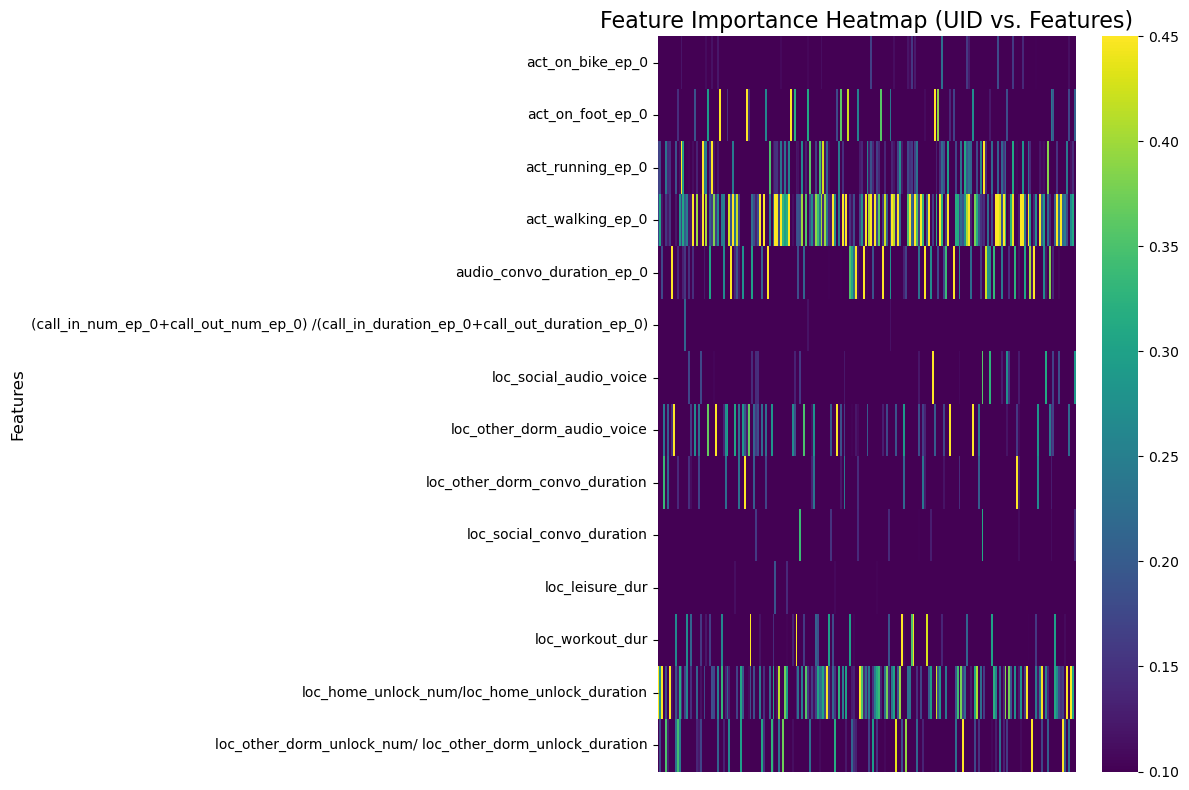

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the heatmap of feature importances
plt.figure(figsize=(12, 8))
sns.heatmap(final_feature_importances_df.set_index('UID')[features_leisure].transpose(), cmap='viridis', annot=False, cbar=True, vmin=0.1, vmax=0.45)
plt.title('Feature Importance Heatmap (UID vs. Features)', fontsize=16)
plt.ylabel('Features', fontsize=12)
plt.xlabel('')  # Remove x-axis label
plt.xticks([])  # Hide x-axis ticks
plt.tight_layout()
plt.show()


## calculate new score based on imp features

In [29]:

feature_means = final_feature_importances_df.drop(columns=['UID']).mean()

sorted_features = feature_means.sort_values(ascending=False)


print("Features sorted by mean importance (descending):")
print(sorted_features)



Features sorted by mean importance (descending):
act_walking_ep_0                                                                        0.226201
loc_home_unlock_num/loc_home_unlock_duration                                            0.159681
act_running_ep_0                                                                        0.117453
audio_convo_duration_ep_0                                                               0.090457
loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration                               0.080565
loc_other_dorm_audio_voice                                                              0.074528
loc_workout_dur                                                                         0.052015
act_on_bike_ep_0                                                                        0.042843
loc_other_dorm_convo_duration                                                           0.038785
act_on_foot_ep_0                                                              

In [30]:

top_features = sorted_features.head(6)


leisure_weight = top_features.to_dict()


print("Leisure Weight Dictionary:")
print(leisure_weight)

Leisure Weight Dictionary:
{'act_walking_ep_0': 0.22620146648051992, 'loc_home_unlock_num/loc_home_unlock_duration': 0.15968081164150422, 'act_running_ep_0': 0.11745338645468008, 'audio_convo_duration_ep_0': 0.09045665871891341, 'loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration': 0.08056485914537055, 'loc_other_dorm_audio_voice': 0.074528416262734}


# Feature imp -> Me Time

In [31]:
data

,uid,is_ios,day,act_on_bike_ep_0,act_on_foot_ep_0,act_running_ep_0,act_still_ep_0,act_walking_ep_0,audio_convo_duration_ep_0,call_in_num_ep_0,...,sleep_heathkit_dur,phq4_category,(call_in_num_ep_0+call_out_num_ep_0) /(call_in_duration_ep_0+call_out_duration_ep_0),loc_home_unlock_num/loc_home_unlock_duration,loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration,loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration,loc_social_unlock_num/ loc_social_unlock_duration,loc_study_unlock_num/loc_study_unlock_duration,sleep_end - sleep_start,unlock_num_ep_0/ unlock_duration_ep_0
0,1ff6d7f34acb354430e7323a35ff7703,1,20170907,0,0.0,7,72169,14223,4485.0,0.0,...,0.000,2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,80,0.012734
1,1ff6d7f34acb354430e7323a35ff7703,1,20170908,0,0.0,13,79532,6854,1600.0,0.0,...,8.267,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,80,0.009665
4,1ff6d7f34acb354430e7323a35ff7703,1,20170911,0,0.0,5,79730,6664,1520.0,0.0,...,8.683,1,0.0,0.457027,0.000000,0.457027,0.000000,1.376451,74,0.010696
10,1ff6d7f34acb354430e7323a35ff7703,1,20170917,0,0.0,2,80442,5955,550.0,0.0,...,8.150,1,0.0,0.576619,0.000000,0.576619,0.000000,0.000000,66,0.010701
19,1ff6d7f34acb354430e7323a35ff7703,1,20170926,0,0.0,8,81686,4705,618.0,0.0,...,8.967,1,0.0,0.551252,0.378203,0.551252,0.000000,0.463510,70,0.009566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216024,6b0083d00297f9c03e00b2cde889b666,1,20201009,0,0.0,426,60534,25439,0.0,0.0,...,7.217,0,0.0,0.572248,2.202799,0.572248,0.000000,0.000000,60,0.015106
216033,6b0083d00297f9c03e00b2cde889b666,1,20201018,0,0.0,11,71389,14999,0.0,0.0,...,6.017,0,0.0,0.573726,0.000000,0.573726,0.000000,0.956318,56,0.013715
216038,6b0083d00297f9c03e00b2cde889b666,1,20201023,0,0.0,111,68992,17069,0.0,0.0,...,0.150,0,0.0,0.344449,1.544171,0.344449,1.544171,0.805250,60,0.014716
216045,6b0083d00297f9c03e00b2cde889b666,1,20201030,0,0.0,22,75031,11346,0.0,0.0,...,0.000,0,0.0,0.575672,1.315964,0.575672,0.000000,0.976428,46,0.015091


In [32]:
features_me.append('uid')

In [33]:
features_me

['act_on_bike_ep_0',
 'act_on_foot_ep_0',
 'act_running_ep_0',
 'act_still_ep_0',
 'act_walking_ep_0',
 'loc_home_audio_voice',
 'loc_self_dorm_audio_voice',
 'loc_study_audio_voice',
 'loc_home_convo_duration',
 'loc_study_convo_duration',
 'loc_self_dorm_convo_duration',
 'loc_self_dorm_dur',
 'loc_study_dur',
 'loc_workout_dur',
 'loc_home_unlock_num/loc_home_unlock_duration',
 'loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration',
 'loc_study_unlock_num/loc_study_unlock_duration',
 'uid']

In [34]:
df_me= data[features_me]
df_me

,act_on_bike_ep_0,act_on_foot_ep_0,act_running_ep_0,act_still_ep_0,act_walking_ep_0,loc_home_audio_voice,loc_self_dorm_audio_voice,loc_study_audio_voice,loc_home_convo_duration,loc_study_convo_duration,loc_self_dorm_convo_duration,loc_self_dorm_dur,loc_study_dur,loc_workout_dur,loc_home_unlock_num/loc_home_unlock_duration,loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration,loc_study_unlock_num/loc_study_unlock_duration,uid
0,0,0.0,7,72169,14223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1ff6d7f34acb354430e7323a35ff7703
1,0,0.0,13,79532,6854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1ff6d7f34acb354430e7323a35ff7703
4,0,0.0,5,79730,6664,0.000000,0.000000,0.065094,0.000000,2.556976,0.000000,18.334722,1.499167,0.0,0.457027,0.457027,1.376451,1ff6d7f34acb354430e7323a35ff7703
10,0,0.0,2,80442,5955,0.041082,0.041082,0.000000,0.295264,0.000000,0.295264,20.885278,0.000000,0.0,0.576619,0.576619,0.000000,1ff6d7f34acb354430e7323a35ff7703
19,0,0.0,8,81686,4705,0.005374,0.005374,0.154533,0.000000,0.996927,0.000000,15.001667,5.333056,0.0,0.551252,0.551252,0.463510,1ff6d7f34acb354430e7323a35ff7703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216024,0,0.0,426,60534,25439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.258056,0.000000,0.0,0.572248,0.572248,0.000000,6b0083d00297f9c03e00b2cde889b666
216033,0,0.0,11,71389,14999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.503611,7.836111,0.0,0.573726,0.573726,0.956318,6b0083d00297f9c03e00b2cde889b666
216038,0,0.0,111,68992,17069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.001944,4.331944,0.0,0.344449,0.344449,0.805250,6b0083d00297f9c03e00b2cde889b666
216045,0,0.0,22,75031,11346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.335556,4.335556,0.0,0.575672,0.575672,0.976428,6b0083d00297f9c03e00b2cde889b666


In [35]:
features_me.remove('uid')

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_me[features_me])

# Apply clustering
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster-based scores
df_me['cluster_score'] = clusters
df_me['metime_score'] = scaled_features.sum(axis=1) + df_me['cluster_score']


/var/folders/8j/mm66f4_n1pl4smvt7jb0kpsm0000gn/T/ipykernel_91892/2830630537.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_me['cluster_score'] = clusters
/var/folders/8j/mm66f4_n1pl4smvt7jb0kpsm0000gn/T/ipykernel_91892/2830630537.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_me['metime_score'] = scaled_features.sum(axis=1) + df_me['cluster_score']


In [37]:
df_me

,act_on_bike_ep_0,act_on_foot_ep_0,act_running_ep_0,act_still_ep_0,act_walking_ep_0,loc_home_audio_voice,loc_self_dorm_audio_voice,loc_study_audio_voice,loc_home_convo_duration,loc_study_convo_duration,loc_self_dorm_convo_duration,loc_self_dorm_dur,loc_study_dur,loc_workout_dur,loc_home_unlock_num/loc_home_unlock_duration,loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration,loc_study_unlock_num/loc_study_unlock_duration,uid,cluster_score,metime_score
0,0,0.0,7,72169,14223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1ff6d7f34acb354430e7323a35ff7703,0,-2.931787
1,0,0.0,13,79532,6854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1ff6d7f34acb354430e7323a35ff7703,0,-3.075346
4,0,0.0,5,79730,6664,0.000000,0.000000,0.065094,0.000000,2.556976,0.000000,18.334722,1.499167,0.0,0.457027,0.457027,1.376451,1ff6d7f34acb354430e7323a35ff7703,3,4.346807
10,0,0.0,2,80442,5955,0.041082,0.041082,0.000000,0.295264,0.000000,0.295264,20.885278,0.000000,0.0,0.576619,0.576619,0.000000,1ff6d7f34acb354430e7323a35ff7703,3,4.526372
19,0,0.0,8,81686,4705,0.005374,0.005374,0.154533,0.000000,0.996927,0.000000,15.001667,5.333056,0.0,0.551252,0.551252,0.463510,1ff6d7f34acb354430e7323a35ff7703,3,5.983732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216024,0,0.0,426,60534,25439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.258056,0.000000,0.0,0.572248,0.572248,0.000000,6b0083d00297f9c03e00b2cde889b666,3,3.417099
216033,0,0.0,11,71389,14999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.503611,7.836111,0.0,0.573726,0.573726,0.956318,6b0083d00297f9c03e00b2cde889b666,3,4.090176
216038,0,0.0,111,68992,17069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.001944,4.331944,0.0,0.344449,0.344449,0.805250,6b0083d00297f9c03e00b2cde889b666,3,3.385938
216045,0,0.0,22,75031,11346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.335556,4.335556,0.0,0.575672,0.575672,0.976428,6b0083d00297f9c03e00b2cde889b666,3,2.564224


In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Define the columns and their respective conditions
features_me = ['act_on_bike_ep_0',
 'act_on_foot_ep_0',
 'act_running_ep_0',
 'act_still_ep_0',
 'act_walking_ep_0',
 'loc_home_audio_voice',
 'loc_self_dorm_audio_voice',
 'loc_study_audio_voice',
 'loc_home_convo_duration',
 'loc_study_convo_duration',
 'loc_self_dorm_convo_duration',
 'loc_self_dorm_dur',
 'loc_study_dur',
 'loc_workout_dur',
 'loc_home_unlock_num/loc_home_unlock_duration',
 'loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration',
 'loc_study_unlock_num/loc_study_unlock_duration']

# Initialize a list to store feature importance data for all UIDs
final_feature_importances = []

# Group by 'uid'
for uid, group in df_me.groupby('uid'):
    print(f"Processing UID: {uid}, Rows in Group: {group.shape[0]}")
    
    # Standardize the features
    scaler = StandardScaler()
    group[features_me] = scaler.fit_transform(group[features_me])

    # Define the me_score calculation
    def calculate_me_score(row):
        score = 0
        for col in features_me:
            if row[col] > 0:  # Since standardized, compare to 0 (mean)
                score += 1
        return score

    # Apply the function to calculate me_score
    group['me_score'] = group.apply(calculate_me_score, axis=1)

    # Use a Random Forest model to assess feature importance
    X = group[features_me]
    y = group['me_score']

    # Train a model
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)

    # Extract feature importances and add UID
    importance_row = {feature: model.feature_importances_[idx] for idx, feature in enumerate(features_me)}
    importance_row['UID'] = uid

    # Append the row to the final list
    final_feature_importances.append(importance_row)

# Create a DataFrame with UIDs as rows and features as columns
final_feature_importances_df = pd.DataFrame(final_feature_importances)

# Verify the DataFrame has the correct number of rows
print(f"Total Unique UIDs Processed: {len(final_feature_importances_df['UID'].unique())}")
print(f"Shape of Feature Importance DataFrame: {final_feature_importances_df.shape}")


Processing UID: 003df5deff30e1e5a07b5d063fe85c3f, Rows in Group: 152
Processing UID: 0107c61e54459068bb83f6be2058d65d, Rows in Group: 190
Processing UID: 01fb41df0f6c2f69d65db5a38c600b4c, Rows in Group: 13
Processing UID: 031cf9537e5da78c5a69a10cba088c94, Rows in Group: 97
Processing UID: 03a0ce5623bfeb8aa3113605f7682215, Rows in Group: 180
Processing UID: 07eab8e219b6a4dcd45167dc216e1189, Rows in Group: 13
Processing UID: 0947cdc8e87a0a45a012aa387ccedbcd, Rows in Group: 186
Processing UID: 0ab7acb36e6c710a7733c1c24e566bb3, Rows in Group: 180
Processing UID: 0aee9faa6f2d2d24d85d2690f5b2df25, Rows in Group: 85
Processing UID: 0b9c2303bcc61063f9a5653d77c90501, Rows in Group: 74
Processing UID: 0ba15aa0582c5e825710d42fe3eb231d, Rows in Group: 208
Processing UID: 0f2be96bde481cd3898f147a995a7d56, Rows in Group: 124
Processing UID: 0f727c1018c74fbb7142e8c7a77840d6, Rows in Group: 210
Processing UID: 107c06248d28377b345ae06e5bda10c1, Rows in Group: 197
Processing UID: 12e0a85ee9819ae1abeca0c

In [39]:
final_feature_importances_df

,act_on_bike_ep_0,act_on_foot_ep_0,act_running_ep_0,act_still_ep_0,act_walking_ep_0,loc_home_audio_voice,loc_self_dorm_audio_voice,loc_study_audio_voice,loc_home_convo_duration,loc_study_convo_duration,loc_self_dorm_convo_duration,loc_self_dorm_dur,loc_study_dur,loc_workout_dur,loc_home_unlock_num/loc_home_unlock_duration,loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration,loc_study_unlock_num/loc_study_unlock_duration,UID
0,0.001056,0.000000,0.015055,0.004826,0.009012,0.057480,0.105589,0.011655,0.036192,0.006190,0.063156,0.223292,0.023280,0.002272,0.073326,0.361287,0.006332,003df5deff30e1e5a07b5d063fe85c3f
1,0.006475,0.000000,0.036170,0.009999,0.017262,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.284714,0.031820,0.000727,0.029411,0.568068,0.015354,0107c61e54459068bb83f6be2058d65d
2,0.000000,0.000000,0.014650,0.024009,0.025928,0.072597,0.077404,0.036684,0.040667,0.033962,0.041999,0.129382,0.165567,0.012396,0.148541,0.136065,0.040147,01fb41df0f6c2f69d65db5a38c600b4c
3,0.008406,0.000000,0.017333,0.007992,0.008916,0.021247,0.286778,0.121130,0.018893,0.133526,0.081431,0.022420,0.021626,0.019780,0.039677,0.176152,0.014693,031cf9537e5da78c5a69a10cba088c94
4,0.012397,0.000000,0.029450,0.018521,0.017494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.246287,0.083776,0.028342,0.038864,0.482907,0.041962,03a0ce5623bfeb8aa3113605f7682215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.000000,0.000000,0.044239,0.032892,0.036528,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.374401,0.137245,0.000000,0.190809,0.151163,0.032723,fbcc8cd8254960ed44ffdd3390a2f6a0
214,0.016524,0.013333,0.000000,0.011486,0.000000,0.044864,0.173466,0.055924,0.036428,0.045749,0.047321,0.030886,0.010333,0.000000,0.037469,0.458565,0.017650,fc26652471ae91bdbbc11a8be89c362c
215,0.015950,0.000000,0.053009,0.021562,0.016803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.548349,0.009411,0.021123,0.065225,0.235836,0.012731,fc73375dda5e5460f7088c78654a945e
216,0.014986,0.000000,0.035117,0.009025,0.011849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067655,0.444551,0.009039,0.038183,0.269560,0.100033,fe8ddda4ae8c71f7054ca024b82f5c98


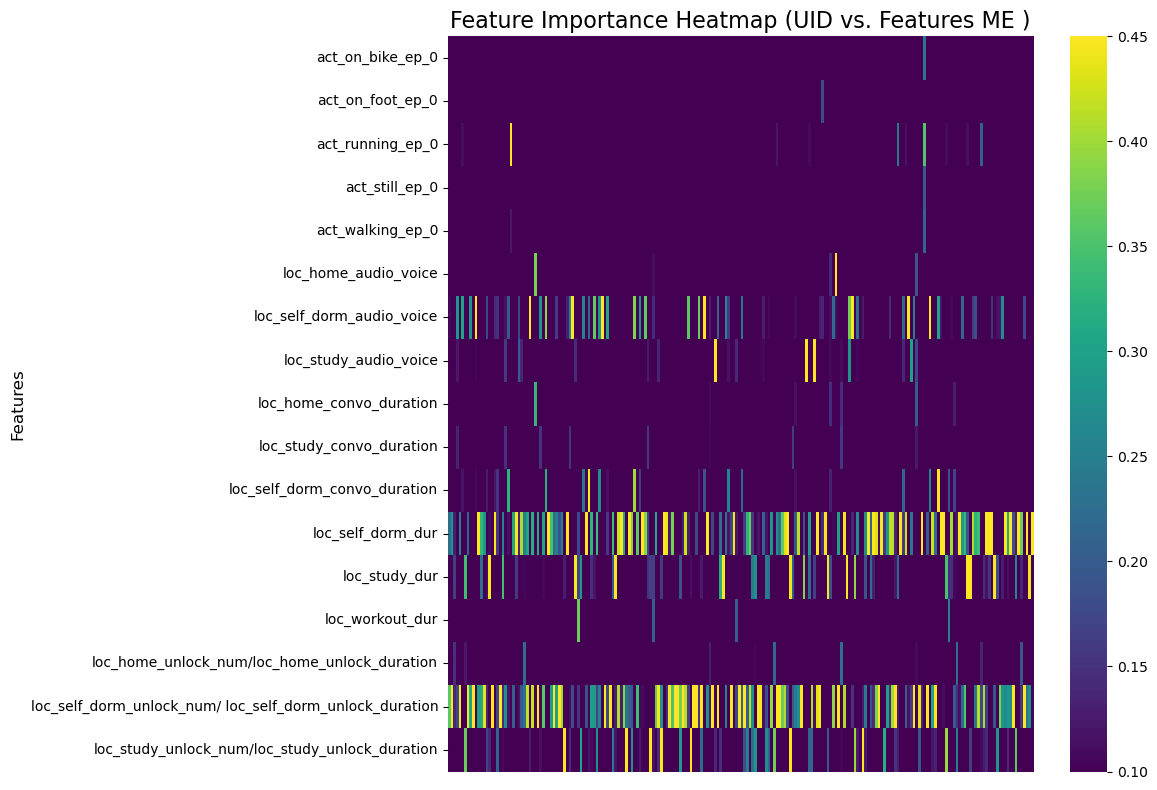

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the heatmap of feature importances
plt.figure(figsize=(12, 8))
sns.heatmap(final_feature_importances_df.set_index('UID')[features_me].transpose(), cmap='viridis', annot=False, cbar=True, vmin=0.1, vmax=0.45)
plt.title('Feature Importance Heatmap (UID vs. Features ME )', fontsize=16)
plt.ylabel('Features', fontsize=12)
plt.xlabel('')  # Remove x-axis label
plt.xticks([])  # Hide x-axis ticks
plt.tight_layout()
plt.show()


## calculate new score based on imp features

In [41]:

feature_means = final_feature_importances_df.drop(columns=['UID']).mean()


sorted_features = feature_means.sort_values(ascending=False)

# Display the sorted features
print("Features sorted by mean importance (descending):")
print(sorted_features)



Features sorted by mean importance (descending):
loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration    0.238360
loc_self_dorm_dur                                          0.215732
loc_study_dur                                              0.097157
loc_study_unlock_num/loc_study_unlock_duration             0.086269
loc_self_dorm_audio_voice                                  0.085431
loc_self_dorm_convo_duration                               0.039842
loc_home_unlock_num/loc_home_unlock_duration               0.039823
act_running_ep_0                                           0.036282
loc_study_audio_voice                                      0.033743
loc_home_audio_voice                                       0.026591
loc_home_convo_duration                                    0.021063
loc_study_convo_duration                                   0.017665
act_still_ep_0                                             0.014245
act_walking_ep_0                                           0.014114

In [42]:

top_features = sorted_features.head(5)


me_weight = top_features.to_dict()

# Display the dictionary
print("Me Time Weight Dictionary:")
print(me_weight)

Me Time Weight Dictionary:
{'loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration': 0.2383602718366372, 'loc_self_dorm_dur': 0.21573187755055687, 'loc_study_dur': 0.09715712843162086, 'loc_study_unlock_num/loc_study_unlock_duration': 0.08626882971803082, 'loc_self_dorm_audio_voice': 0.08543121450686625}


# Frature imp -> Phone

In [43]:
# Feature imp -> Phone Time data
features_phone.append('uid')
features_phone

['audio_convo_duration_ep_0',
 '(call_in_num_ep_0+call_out_num_ep_0) /(call_in_duration_ep_0+call_out_duration_ep_0)',
 'loc_home_audio_voice',
 'loc_social_audio_voice',
 'loc_self_dorm_audio_voice',
 'loc_home_convo_duration',
 'loc_self_dorm_convo_duration',
 'loc_home_unlock_num/loc_home_unlock_duration',
 'loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration',
 'loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration',
 'loc_social_unlock_num/ loc_social_unlock_duration',
 'loc_study_unlock_num/loc_study_unlock_duration',
 'unlock_num_ep_0/ unlock_duration_ep_0',
 'uid']

In [44]:
df_phone= data[features_phone]
df_phone

,audio_convo_duration_ep_0,(call_in_num_ep_0+call_out_num_ep_0) /(call_in_duration_ep_0+call_out_duration_ep_0),loc_home_audio_voice,loc_social_audio_voice,loc_self_dorm_audio_voice,loc_home_convo_duration,loc_self_dorm_convo_duration,loc_home_unlock_num/loc_home_unlock_duration,loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration,loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration,loc_social_unlock_num/ loc_social_unlock_duration,loc_study_unlock_num/loc_study_unlock_duration,unlock_num_ep_0/ unlock_duration_ep_0,uid
0,4485.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012734,1ff6d7f34acb354430e7323a35ff7703
1,1600.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009665,1ff6d7f34acb354430e7323a35ff7703
4,1520.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.457027,0.000000,0.457027,0.000000,1.376451,0.010696,1ff6d7f34acb354430e7323a35ff7703
10,550.0,0.0,0.041082,0.0,0.041082,0.295264,0.295264,0.576619,0.000000,0.576619,0.000000,0.000000,0.010701,1ff6d7f34acb354430e7323a35ff7703
19,618.0,0.0,0.005374,0.0,0.005374,0.000000,0.000000,0.551252,0.378203,0.551252,0.000000,0.463510,0.009566,1ff6d7f34acb354430e7323a35ff7703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216024,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.572248,2.202799,0.572248,0.000000,0.000000,0.015106,6b0083d00297f9c03e00b2cde889b666
216033,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.573726,0.000000,0.573726,0.000000,0.956318,0.013715,6b0083d00297f9c03e00b2cde889b666
216038,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.344449,1.544171,0.344449,1.544171,0.805250,0.014716,6b0083d00297f9c03e00b2cde889b666
216045,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.575672,1.315964,0.575672,0.000000,0.976428,0.015091,6b0083d00297f9c03e00b2cde889b666


In [45]:
features_phone.remove('uid')

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_phone[features_phone])

# Apply clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster-based scores
df_phone['cluster_score'] = clusters
df_phone['phonetime_score'] = scaled_features.sum(axis=1) + df_phone['cluster_score']

df_phone

/var/folders/8j/mm66f4_n1pl4smvt7jb0kpsm0000gn/T/ipykernel_91892/3251487731.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phone['cluster_score'] = clusters
/var/folders/8j/mm66f4_n1pl4smvt7jb0kpsm0000gn/T/ipykernel_91892/3251487731.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phone['phonetime_score'] = scaled_features.sum(axis=1) + df_phone['cluster_score']


,audio_convo_duration_ep_0,(call_in_num_ep_0+call_out_num_ep_0) /(call_in_duration_ep_0+call_out_duration_ep_0),loc_home_audio_voice,loc_social_audio_voice,loc_self_dorm_audio_voice,loc_home_convo_duration,loc_self_dorm_convo_duration,loc_home_unlock_num/loc_home_unlock_duration,loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration,loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration,loc_social_unlock_num/ loc_social_unlock_duration,loc_study_unlock_num/loc_study_unlock_duration,unlock_num_ep_0/ unlock_duration_ep_0,uid,cluster_score,phonetime_score
0,4485.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012734,1ff6d7f34acb354430e7323a35ff7703,0,-1.363925
1,1600.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009665,1ff6d7f34acb354430e7323a35ff7703,0,-1.756320
4,1520.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.457027,0.000000,0.457027,0.000000,1.376451,0.010696,1ff6d7f34acb354430e7323a35ff7703,0,-1.711880
10,550.0,0.0,0.041082,0.0,0.041082,0.295264,0.295264,0.576619,0.000000,0.576619,0.000000,0.000000,0.010701,1ff6d7f34acb354430e7323a35ff7703,0,-0.283948
19,618.0,0.0,0.005374,0.0,0.005374,0.000000,0.000000,0.551252,0.378203,0.551252,0.000000,0.463510,0.009566,1ff6d7f34acb354430e7323a35ff7703,0,-1.654414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216024,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.572248,2.202799,0.572248,0.000000,0.000000,0.015106,6b0083d00297f9c03e00b2cde889b666,0,-1.879296
216033,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.573726,0.000000,0.573726,0.000000,0.956318,0.013715,6b0083d00297f9c03e00b2cde889b666,0,-1.906589
216038,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.344449,1.544171,0.344449,1.544171,0.805250,0.014716,6b0083d00297f9c03e00b2cde889b666,0,-1.864869
216045,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.575672,1.315964,0.575672,0.000000,0.976428,0.015091,6b0083d00297f9c03e00b2cde889b666,0,-1.879462


In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Define the columns and their respective conditions
features_phone = ['audio_convo_duration_ep_0',
 '(call_in_num_ep_0+call_out_num_ep_0) /(call_in_duration_ep_0+call_out_duration_ep_0)',
 'loc_home_audio_voice',
 'loc_social_audio_voice',
 'loc_self_dorm_audio_voice',
 'loc_home_convo_duration',
 'loc_self_dorm_convo_duration',
 'loc_home_unlock_num/loc_home_unlock_duration',
 'loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration',
 'loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration',
 'loc_social_unlock_num/ loc_social_unlock_duration',
 'loc_study_unlock_num/loc_study_unlock_duration',
 'unlock_num_ep_0/ unlock_duration_ep_0']

# Initialize a list to store feature importance data for all UIDs
final_feature_importances = []

# Group by 'uid'
for uid, group in df_phone.groupby('uid'):
    print(f"Processing UID: {uid}, Rows in Group: {group.shape[0]}")
    
    # Standardize the features
    scaler = StandardScaler()
    group[features_phone] = scaler.fit_transform(group[features_phone])

    # Define the phone_score calculation
    def calculate_phone_score(row):
        score = 0
        for col in features_phone:
            if row[col] > 0:  # Since standardized, compare to 0 (mean)
                score += 1
        return score
    # Apply the function to calculate phone_score
    group['phone_score'] = group.apply(calculate_phone_score, axis=1)

    # Use a Random Forest model to assess feature importance
    X = group[features_phone]
    y = group['phone_score']

    # Train a model
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)

    # Extract feature importances and add UID
    importance_row = {feature: model.feature_importances_[idx] for idx, feature in enumerate(features_phone)}
    importance_row['UID'] = uid

    # Append the row to the final list
    final_feature_importances.append(importance_row)

# Create a DataFrame with UIDs as rows and features as columns
final_feature_importances_df = pd.DataFrame(final_feature_importances)

Processing UID: 003df5deff30e1e5a07b5d063fe85c3f, Rows in Group: 152
Processing UID: 0107c61e54459068bb83f6be2058d65d, Rows in Group: 190
Processing UID: 01fb41df0f6c2f69d65db5a38c600b4c, Rows in Group: 13
Processing UID: 031cf9537e5da78c5a69a10cba088c94, Rows in Group: 97
Processing UID: 03a0ce5623bfeb8aa3113605f7682215, Rows in Group: 180
Processing UID: 07eab8e219b6a4dcd45167dc216e1189, Rows in Group: 13
Processing UID: 0947cdc8e87a0a45a012aa387ccedbcd, Rows in Group: 186
Processing UID: 0ab7acb36e6c710a7733c1c24e566bb3, Rows in Group: 180
Processing UID: 0aee9faa6f2d2d24d85d2690f5b2df25, Rows in Group: 85
Processing UID: 0b9c2303bcc61063f9a5653d77c90501, Rows in Group: 74
Processing UID: 0ba15aa0582c5e825710d42fe3eb231d, Rows in Group: 208
Processing UID: 0f2be96bde481cd3898f147a995a7d56, Rows in Group: 124
Processing UID: 0f727c1018c74fbb7142e8c7a77840d6, Rows in Group: 210
Processing UID: 107c06248d28377b345ae06e5bda10c1, Rows in Group: 197
Processing UID: 12e0a85ee9819ae1abeca0c

In [48]:

# Verify the DataFrame has the correct number of rows
print(f"Total Unique UIDs Processed: {len(final_feature_importances_df['UID'].unique())}")
print(f"Shape of Feature Importance DataFrame: {final_feature_importances_df.shape}")

Total Unique UIDs Processed: 218
Shape of Feature Importance DataFrame: (218, 14)


In [49]:
final_feature_importances_df

,audio_convo_duration_ep_0,(call_in_num_ep_0+call_out_num_ep_0) /(call_in_duration_ep_0+call_out_duration_ep_0),loc_home_audio_voice,loc_social_audio_voice,loc_self_dorm_audio_voice,loc_home_convo_duration,loc_self_dorm_convo_duration,loc_home_unlock_num/loc_home_unlock_duration,loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration,loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration,loc_social_unlock_num/ loc_social_unlock_duration,loc_study_unlock_num/loc_study_unlock_duration,unlock_num_ep_0/ unlock_duration_ep_0,UID
0,0.009652,0.000000,0.048364,0.002071,0.176240,0.029981,0.282144,0.216066,0.014399,0.164173,0.012859,0.035470,0.008581,003df5deff30e1e5a07b5d063fe85c3f
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040964,0.042244,0.821557,0.015951,0.022635,0.056649,0107c61e54459068bb83f6be2058d65d
2,0.053684,0.000000,0.084749,0.002183,0.051578,0.023501,0.021760,0.302597,0.005432,0.271950,0.000369,0.015681,0.166518,01fb41df0f6c2f69d65db5a38c600b4c
3,0.027658,0.000000,0.022639,0.018080,0.248491,0.012838,0.322200,0.057420,0.027017,0.169523,0.031501,0.020139,0.042494,031cf9537e5da78c5a69a10cba088c94
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.273866,0.268736,0.345190,0.027248,0.019112,0.065849,03a0ce5623bfeb8aa3113605f7682215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.272996,0.030878,0.254565,0.053674,0.027149,0.360738,fbcc8cd8254960ed44ffdd3390a2f6a0
214,0.031601,0.015665,0.060095,0.001606,0.028853,0.086627,0.027272,0.015448,0.008809,0.646088,0.001648,0.021235,0.055052,fc26652471ae91bdbbc11a8be89c362c
215,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141552,0.039924,0.239807,0.002863,0.005019,0.570834,fc73375dda5e5460f7088c78654a945e
216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076801,0.015663,0.530512,0.035345,0.260304,0.081375,fe8ddda4ae8c71f7054ca024b82f5c98


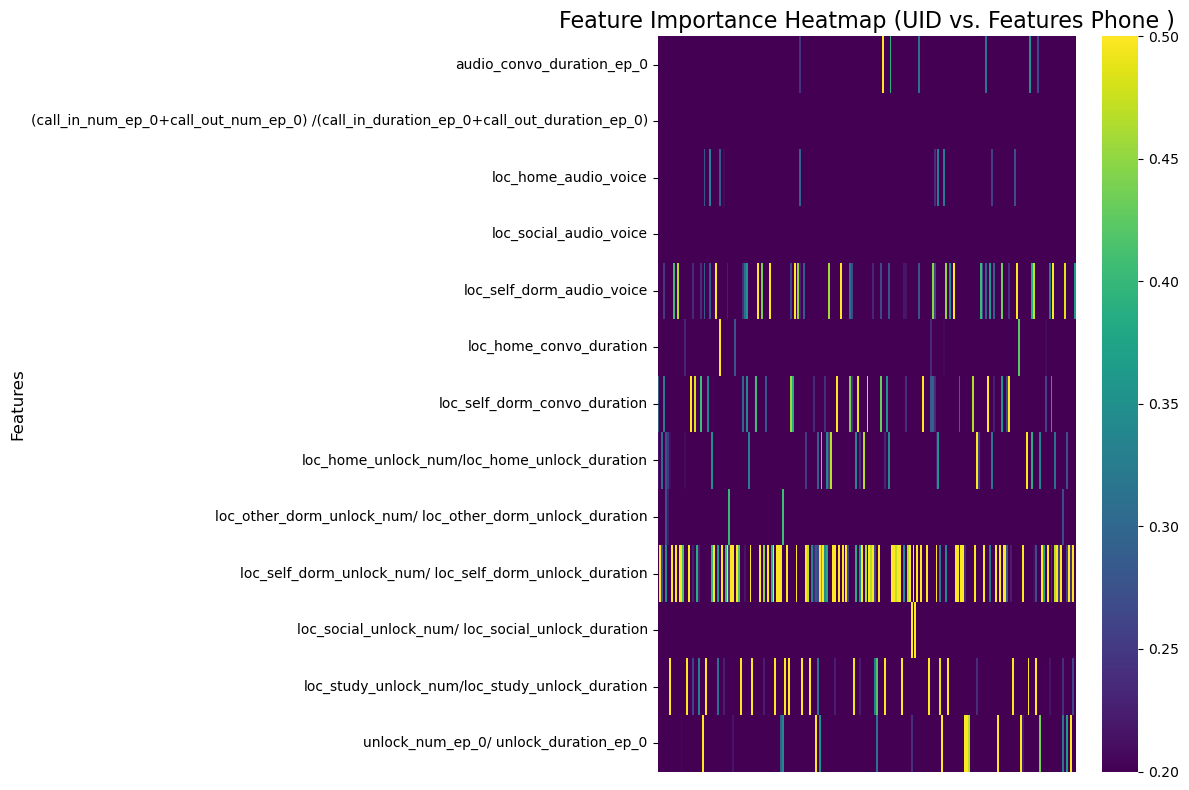

In [50]:


import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the heatmap of feature importances
plt.figure(figsize=(12, 8))
sns.heatmap(final_feature_importances_df.set_index('UID')[features_phone].transpose(), cmap='viridis', annot=False, cbar=True, vmin=0.2, vmax=0.5)
plt.title('Feature Importance Heatmap (UID vs. Features Phone )', fontsize=16)
plt.ylabel('Features', fontsize=12)
plt.xlabel('')  # Remove x-axis label
plt.xticks([])  # Hide x-axis ticks
plt.tight_layout()
plt.show()


## calculate new score based on imp features

In [51]:

feature_means = final_feature_importances_df.drop(columns=['UID']).mean()

# Sort features by mean importance in descending order
sorted_features = feature_means.sort_values(ascending=False)

# Display the sorted features
print("Features sorted by mean importance (descending):")
print(sorted_features)



Features sorted by mean importance (descending):
loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration                                 0.290715
unlock_num_ep_0/ unlock_duration_ep_0                                                   0.116518
loc_self_dorm_audio_voice                                                               0.112033
loc_study_unlock_num/loc_study_unlock_duration                                          0.108552
loc_home_unlock_num/loc_home_unlock_duration                                            0.096876
loc_self_dorm_convo_duration                                                            0.087334
loc_home_audio_voice                                                                    0.044593
audio_convo_duration_ep_0                                                               0.037881
loc_home_convo_duration                                                                 0.035917
loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration                     

In [52]:
# Select the top 6 features with the highest mean importance
top_features = sorted_features.head(5)

# Create a dictionary with feature names as keys and their mean values as values
phone_weight = top_features.to_dict()

# Display the dictionary
print("phoneWeight Dictionary:")
print(phone_weight)

phoneWeight Dictionary:
{'loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration': 0.2907148331732331, 'unlock_num_ep_0/ unlock_duration_ep_0': 0.11651780780806302, 'loc_self_dorm_audio_voice': 0.11203313466038149, 'loc_study_unlock_num/loc_study_unlock_duration': 0.10855164962045247, 'loc_home_unlock_num/loc_home_unlock_duration': 0.09687647863564318}


# Frature imp -> Sleep

In [53]:
# Feature imp -> Phone Time data
features_sleep.append('uid')
features_sleep

['act_still_ep_0',
 'loc_home_audio_voice',
 'loc_home_convo_duration',
 'loc_self_dorm_dur',
 'loc_study_unlock_num/loc_study_unlock_duration',
 'sleep_duration',
 'sleep_end - sleep_start',
 'sleep_heathkit_dur',
 'uid']

In [54]:
df_sleep= data[features_sleep]
df_sleep

,act_still_ep_0,loc_home_audio_voice,loc_home_convo_duration,loc_self_dorm_dur,loc_study_unlock_num/loc_study_unlock_duration,sleep_duration,sleep_end - sleep_start,sleep_heathkit_dur,uid
0,72169,0.000000,0.000000,0.000000,0.000000,10.00,80,0.000,1ff6d7f34acb354430e7323a35ff7703
1,79532,0.000000,0.000000,0.000000,0.000000,10.00,80,8.267,1ff6d7f34acb354430e7323a35ff7703
4,79730,0.000000,0.000000,18.334722,1.376451,9.25,74,8.683,1ff6d7f34acb354430e7323a35ff7703
10,80442,0.041082,0.295264,20.885278,0.000000,8.25,66,8.150,1ff6d7f34acb354430e7323a35ff7703
19,81686,0.005374,0.000000,15.001667,0.463510,8.75,70,8.967,1ff6d7f34acb354430e7323a35ff7703
...,...,...,...,...,...,...,...,...,...
216024,60534,0.000000,0.000000,14.258056,0.000000,7.50,60,7.217,6b0083d00297f9c03e00b2cde889b666
216033,71389,0.000000,0.000000,11.503611,0.956318,7.00,56,6.017,6b0083d00297f9c03e00b2cde889b666
216038,68992,0.000000,0.000000,12.001944,0.805250,7.50,60,0.150,6b0083d00297f9c03e00b2cde889b666
216045,75031,0.000000,0.000000,8.335556,0.976428,5.75,46,0.000,6b0083d00297f9c03e00b2cde889b666


In [55]:
features_sleep.remove('uid')

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_sleep[features_sleep])

# Apply clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster-based scores
df_sleep['cluster_score'] = clusters
df_sleep['sleeptime_score'] = scaled_features.sum(axis=1) + df_sleep['cluster_score']

df_sleep

/var/folders/8j/mm66f4_n1pl4smvt7jb0kpsm0000gn/T/ipykernel_91892/2057036115.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sleep['cluster_score'] = clusters
/var/folders/8j/mm66f4_n1pl4smvt7jb0kpsm0000gn/T/ipykernel_91892/2057036115.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sleep['sleeptime_score'] = scaled_features.sum(axis=1) + df_sleep['cluster_score']


,act_still_ep_0,loc_home_audio_voice,loc_home_convo_duration,loc_self_dorm_dur,loc_study_unlock_num/loc_study_unlock_duration,sleep_duration,sleep_end - sleep_start,sleep_heathkit_dur,uid,cluster_score,sleeptime_score
0,72169,0.000000,0.000000,0.000000,0.000000,10.00,80,0.000,1ff6d7f34acb354430e7323a35ff7703,0,0.268533
1,79532,0.000000,0.000000,0.000000,0.000000,10.00,80,8.267,1ff6d7f34acb354430e7323a35ff7703,0,3.322382
4,79730,0.000000,0.000000,18.334722,1.376451,9.25,74,8.683,1ff6d7f34acb354430e7323a35ff7703,0,5.549818
10,80442,0.041082,0.295264,20.885278,0.000000,8.25,66,8.150,1ff6d7f34acb354430e7323a35ff7703,0,5.756221
19,81686,0.005374,0.000000,15.001667,0.463510,8.75,70,8.967,1ff6d7f34acb354430e7323a35ff7703,0,5.039094
...,...,...,...,...,...,...,...,...,...,...,...
216024,60534,0.000000,0.000000,14.258056,0.000000,7.50,60,7.217,6b0083d00297f9c03e00b2cde889b666,1,1.935515
216033,71389,0.000000,0.000000,11.503611,0.956318,7.00,56,6.017,6b0083d00297f9c03e00b2cde889b666,0,1.091655
216038,68992,0.000000,0.000000,12.001944,0.805250,7.50,60,0.150,6b0083d00297f9c03e00b2cde889b666,1,0.718091
216045,75031,0.000000,0.000000,8.335556,0.976428,5.75,46,0.000,6b0083d00297f9c03e00b2cde889b666,1,-0.539188


In [58]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Define the columns and their respective conditions
features_sleep = ['act_still_ep_0',
 'loc_home_audio_voice',
 'loc_home_convo_duration',
 'loc_self_dorm_dur',
 'loc_study_unlock_num/loc_study_unlock_duration',
 'sleep_duration',
 'sleep_end - sleep_start',
 'sleep_heathkit_dur']

# Initialize a list to store feature importance data for all UIDs
final_feature_importances = []

# Group by 'uid'
for uid, group in df_sleep.groupby('uid'):
    print(f"Processing UID: {uid}, Rows in Group: {group.shape[0]}")
    
    # Standardize the features
    scaler = StandardScaler()
    group[features_sleep] = scaler.fit_transform(group[features_sleep])

    # Define the sleep_score calculation
    def calculate_sleep_score(row):
        score = 0
        for col in features_sleep:
            if row[col] > 0:  # Since standardized, compare to 0 (mean)
                score += 1
        return score

    # Apply the function to calculate sleep_score
    group['sleep_score'] = group.apply(calculate_sleep_score, axis=1)

    # Use a Random Forest model to assess feature importance
    X = group[features_sleep]
    y = group['sleep_score']

    # Train a model
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)

    # Extract feature importances and add UID
    importance_row = {feature: model.feature_importances_[idx] for idx, feature in enumerate(features_sleep)}
    importance_row['UID'] = uid

    # Append the row to the final list
    final_feature_importances.append(importance_row)

# Create a DataFrame with UIDs as rows and features as columns
final_feature_importances_df = pd.DataFrame(final_feature_importances)

Processing UID: 003df5deff30e1e5a07b5d063fe85c3f, Rows in Group: 152
Processing UID: 0107c61e54459068bb83f6be2058d65d, Rows in Group: 190
Processing UID: 01fb41df0f6c2f69d65db5a38c600b4c, Rows in Group: 13
Processing UID: 031cf9537e5da78c5a69a10cba088c94, Rows in Group: 97
Processing UID: 03a0ce5623bfeb8aa3113605f7682215, Rows in Group: 180
Processing UID: 07eab8e219b6a4dcd45167dc216e1189, Rows in Group: 13
Processing UID: 0947cdc8e87a0a45a012aa387ccedbcd, Rows in Group: 186
Processing UID: 0ab7acb36e6c710a7733c1c24e566bb3, Rows in Group: 180
Processing UID: 0aee9faa6f2d2d24d85d2690f5b2df25, Rows in Group: 85
Processing UID: 0b9c2303bcc61063f9a5653d77c90501, Rows in Group: 74
Processing UID: 0ba15aa0582c5e825710d42fe3eb231d, Rows in Group: 208
Processing UID: 0f2be96bde481cd3898f147a995a7d56, Rows in Group: 124
Processing UID: 0f727c1018c74fbb7142e8c7a77840d6, Rows in Group: 210
Processing UID: 107c06248d28377b345ae06e5bda10c1, Rows in Group: 197
Processing UID: 12e0a85ee9819ae1abeca0c

In [59]:
# Verify the DataFrame has the correct number of rows
print(f"Total Unique UIDs Processed: {len(final_feature_importances_df['UID'].unique())}")
print(f"Shape of Feature Importance DataFrame: {final_feature_importances_df.shape}")


Total Unique UIDs Processed: 218
Shape of Feature Importance DataFrame: (218, 9)


In [60]:
final_feature_importances_df

,act_still_ep_0,loc_home_audio_voice,loc_home_convo_duration,loc_self_dorm_dur,loc_study_unlock_num/loc_study_unlock_duration,sleep_duration,sleep_end - sleep_start,sleep_heathkit_dur,UID
0,0.091453,0.213957,0.151637,0.134580,0.004332,0.169619,0.147613,0.086808,003df5deff30e1e5a07b5d063fe85c3f
1,0.118079,0.000000,0.000000,0.243239,0.103827,0.226685,0.305038,0.003132,0107c61e54459068bb83f6be2058d65d
2,0.073689,0.073753,0.458175,0.093446,0.051386,0.098595,0.068472,0.082485,01fb41df0f6c2f69d65db5a38c600b4c
3,0.078470,0.210318,0.056615,0.172017,0.010790,0.205319,0.216501,0.049969,031cf9537e5da78c5a69a10cba088c94
4,0.134913,0.000000,0.000000,0.132573,0.007531,0.292073,0.421593,0.011317,03a0ce5623bfeb8aa3113605f7682215
...,...,...,...,...,...,...,...,...,...
213,0.308401,0.000000,0.000000,0.047379,0.223816,0.211317,0.209087,0.000000,fbcc8cd8254960ed44ffdd3390a2f6a0
214,0.071677,0.118250,0.330214,0.088693,0.027228,0.201102,0.162837,0.000000,fc26652471ae91bdbbc11a8be89c362c
215,0.169975,0.000000,0.000000,0.134496,0.013227,0.281721,0.386590,0.013991,fc73375dda5e5460f7088c78654a945e
216,0.152585,0.000000,0.000000,0.024649,0.316216,0.188468,0.259214,0.058868,fe8ddda4ae8c71f7054ca024b82f5c98


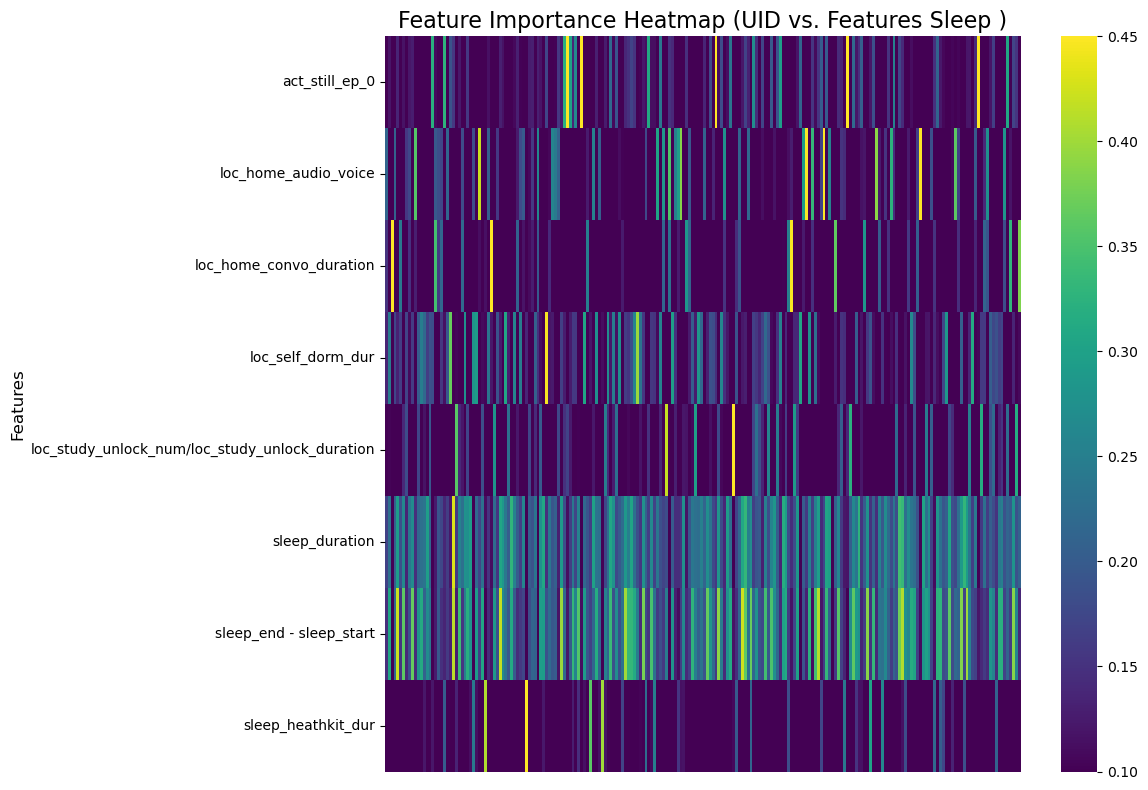

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the heatmap of feature importances
plt.figure(figsize=(12, 8))
sns.heatmap(final_feature_importances_df.set_index('UID')[features_sleep].transpose(), cmap='viridis', annot=False, cbar=True, vmin=0.1, vmax=0.45)
plt.title('Feature Importance Heatmap (UID vs. Features Sleep )', fontsize=16)
plt.ylabel('Features', fontsize=12)
plt.xlabel('')  # Remove x-axis label
plt.xticks([])  # Hide x-axis ticks
plt.tight_layout()
plt.show()

## calculate new score based on imp features

In [62]:

feature_means = final_feature_importances_df.drop(columns=['UID']).mean()

# Sort features by mean importance in descending order
sorted_features = feature_means.sort_values(ascending=False)

# Display the sorted features
print("Features sorted by mean importance (descending):")
print(sorted_features)



Features sorted by mean importance (descending):
sleep_end - sleep_start                           0.227884
sleep_duration                                    0.209939
loc_self_dorm_dur                                 0.132083
act_still_ep_0                                    0.122745
loc_home_audio_voice                              0.086231
loc_study_unlock_num/loc_study_unlock_duration    0.085679
sleep_heathkit_dur                                0.066659
loc_home_convo_duration                           0.064192
dtype: float64


In [63]:
# Select the top 6 features with the highest mean importance
top_features = sorted_features.head(4)

# Create a dictionary with feature names as keys and their mean values as values
sleep_weight = top_features.to_dict()

# Display the dictionary
print("sleep Weight Dictionary:")
print(sleep_weight)

sleep Weight Dictionary:
{'sleep_end - sleep_start': 0.22788432019643068, 'sleep_duration': 0.20993908110890402, 'loc_self_dorm_dur': 0.13208284049686939, 'act_still_ep_0': 0.12274494308902273}


# Feature imp-> social

In [64]:
features_social.append('uid')
features_social

['act_on_foot_ep_0',
 'act_walking_ep_0',
 'audio_convo_duration_ep_0',
 'loc_food_audio_voice',
 'loc_social_audio_voice',
 'loc_other_dorm_audio_voice',
 'loc_study_audio_voice',
 'loc_food_convo_duration',
 'loc_other_dorm_convo_duration',
 'loc_social_convo_duration',
 'loc_study_convo_duration',
 'loc_leisure_dur',
 'loc_other_dorm_dur',
 'loc_social_dur',
 'loc_study_dur',
 'loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration',
 'loc_social_unlock_num/ loc_social_unlock_duration',
 'uid']

In [65]:
df_social= data[features_social]
df_social

,act_on_foot_ep_0,act_walking_ep_0,audio_convo_duration_ep_0,loc_food_audio_voice,loc_social_audio_voice,loc_other_dorm_audio_voice,loc_study_audio_voice,loc_food_convo_duration,loc_other_dorm_convo_duration,loc_social_convo_duration,loc_study_convo_duration,loc_leisure_dur,loc_other_dorm_dur,loc_social_dur,loc_study_dur,loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration,loc_social_unlock_num/ loc_social_unlock_duration,uid
0,0.0,14223,4485.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1ff6d7f34acb354430e7323a35ff7703
1,0.0,6854,1600.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1ff6d7f34acb354430e7323a35ff7703
4,0.0,6664,1520.0,0.033333,0.0,0.0,0.065094,0.000000,0.0,0.0,2.556976,0.000000,0.000000,0.000000,1.499167,0.000000,0.000000,1ff6d7f34acb354430e7323a35ff7703
10,0.0,5955,550.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1ff6d7f34acb354430e7323a35ff7703
19,0.0,4705,618.0,0.131920,0.0,0.0,0.154533,2.137767,0.0,0.0,0.996927,0.000000,0.665556,0.000000,5.333056,0.378203,0.000000,1ff6d7f34acb354430e7323a35ff7703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216024,0.0,25439,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,2.333333,1.497500,0.000000,0.000000,2.202799,0.000000,6b0083d00297f9c03e00b2cde889b666
216033,0.0,14999,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,7.836111,0.000000,0.000000,6b0083d00297f9c03e00b2cde889b666
216038,0.0,17069,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.497500,1.665556,1.665556,4.331944,1.544171,1.544171,6b0083d00297f9c03e00b2cde889b666
216045,0.0,11346,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,7.001389,0.000000,4.335556,1.315964,0.000000,6b0083d00297f9c03e00b2cde889b666


In [66]:
features_social.remove('uid')

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_social[features_social])

# Apply clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster-based scores
df_social['cluster_score'] = clusters
df_social['socialtime_score'] = scaled_features.sum(axis=1) + df_social['cluster_score']

df_social

/var/folders/8j/mm66f4_n1pl4smvt7jb0kpsm0000gn/T/ipykernel_91892/1896470776.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_social['cluster_score'] = clusters
/var/folders/8j/mm66f4_n1pl4smvt7jb0kpsm0000gn/T/ipykernel_91892/1896470776.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_social['socialtime_score'] = scaled_features.sum(axis=1) + df_social['cluster_score']


,act_on_foot_ep_0,act_walking_ep_0,audio_convo_duration_ep_0,loc_food_audio_voice,loc_social_audio_voice,loc_other_dorm_audio_voice,loc_study_audio_voice,loc_food_convo_duration,loc_other_dorm_convo_duration,loc_social_convo_duration,loc_study_convo_duration,loc_leisure_dur,loc_other_dorm_dur,loc_social_dur,loc_study_dur,loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration,loc_social_unlock_num/ loc_social_unlock_duration,uid,cluster_score,socialtime_score
0,0.0,14223,4485.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1ff6d7f34acb354430e7323a35ff7703,0,-2.330348
1,0.0,6854,1600.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1ff6d7f34acb354430e7323a35ff7703,0,-3.726843
4,0.0,6664,1520.0,0.033333,0.0,0.0,0.065094,0.000000,0.0,0.0,2.556976,0.000000,0.000000,0.000000,1.499167,0.000000,0.000000,1ff6d7f34acb354430e7323a35ff7703,0,-1.818925
10,0.0,5955,550.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1ff6d7f34acb354430e7323a35ff7703,0,-3.990426
19,0.0,4705,618.0,0.131920,0.0,0.0,0.154533,2.137767,0.0,0.0,0.996927,0.000000,0.665556,0.000000,5.333056,0.378203,0.000000,1ff6d7f34acb354430e7323a35ff7703,0,0.959966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216024,0.0,25439,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,2.333333,1.497500,0.000000,0.000000,2.202799,0.000000,6b0083d00297f9c03e00b2cde889b666,0,1.697488
216033,0.0,14999,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,7.836111,0.000000,0.000000,6b0083d00297f9c03e00b2cde889b666,0,-0.553679
216038,0.0,17069,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.497500,1.665556,1.665556,4.331944,1.544171,1.544171,6b0083d00297f9c03e00b2cde889b666,0,1.733107
216045,0.0,11346,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,7.001389,0.000000,4.335556,1.315964,0.000000,6b0083d00297f9c03e00b2cde889b666,0,0.891495


In [68]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Define the columns and their respective conditions
features_social =['act_on_foot_ep_0',
 'act_walking_ep_0',
 'audio_convo_duration_ep_0',
 'loc_food_audio_voice',
 'loc_social_audio_voice',
 'loc_other_dorm_audio_voice',
 'loc_study_audio_voice',
 'loc_food_convo_duration',
 'loc_other_dorm_convo_duration',
 'loc_social_convo_duration',
 'loc_study_convo_duration',
 'loc_leisure_dur',
 'loc_other_dorm_dur',
 'loc_social_dur',
 'loc_study_dur',
 'loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration',
 'loc_social_unlock_num/ loc_social_unlock_duration']

# Initialize a list to store feature importance data for all UIDs
final_feature_importances = []

# Group by 'uid'
for uid, group in df_social.groupby('uid'):
    print(f"Processing UID: {uid}, Rows in Group: {group.shape[0]}")
    
    # Standardize the features
    scaler = StandardScaler()
    group[features_social] = scaler.fit_transform(group[features_social])

    # Define the social_score calculation
    def calculate_social_score(row):
        score = 0
        for col in features_social:
            if row[col] > 0:  # Since standardized, compare to 0 (mean)
                score += 1
        return score

    # Apply the function to calculate social_score
    group['social_score'] = group.apply(calculate_social_score, axis=1)

    # Use a Random Forest model to assess feature importance
    X = group[features_social]
    y = group['social_score']

    # Train a model
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)

    # Extract feature importances and add UID
    importance_row = {feature: model.feature_importances_[idx] for idx, feature in enumerate(features_social)}
    importance_row['UID'] = uid

    # Append the row to the final list
    final_feature_importances.append(importance_row)

# Create a DataFrame with UIDs as rows and features as columns
final_feature_importances_df = pd.DataFrame(final_feature_importances)


Processing UID: 003df5deff30e1e5a07b5d063fe85c3f, Rows in Group: 152
Processing UID: 0107c61e54459068bb83f6be2058d65d, Rows in Group: 190
Processing UID: 01fb41df0f6c2f69d65db5a38c600b4c, Rows in Group: 13
Processing UID: 031cf9537e5da78c5a69a10cba088c94, Rows in Group: 97
Processing UID: 03a0ce5623bfeb8aa3113605f7682215, Rows in Group: 180
Processing UID: 07eab8e219b6a4dcd45167dc216e1189, Rows in Group: 13
Processing UID: 0947cdc8e87a0a45a012aa387ccedbcd, Rows in Group: 186
Processing UID: 0ab7acb36e6c710a7733c1c24e566bb3, Rows in Group: 180
Processing UID: 0aee9faa6f2d2d24d85d2690f5b2df25, Rows in Group: 85
Processing UID: 0b9c2303bcc61063f9a5653d77c90501, Rows in Group: 74
Processing UID: 0ba15aa0582c5e825710d42fe3eb231d, Rows in Group: 208
Processing UID: 0f2be96bde481cd3898f147a995a7d56, Rows in Group: 124
Processing UID: 0f727c1018c74fbb7142e8c7a77840d6, Rows in Group: 210
Processing UID: 107c06248d28377b345ae06e5bda10c1, Rows in Group: 197
Processing UID: 12e0a85ee9819ae1abeca0c

In [69]:
# Verify the DataFrame has the correct number of rows
print(f"Total Unique UIDs Processed: {len(final_feature_importances_df['UID'].unique())}")
print(f"Shape of Feature Importance DataFrame: {final_feature_importances_df.shape}")


Total Unique UIDs Processed: 218
Shape of Feature Importance DataFrame: (218, 18)


In [70]:
final_feature_importances_df

,act_on_foot_ep_0,act_walking_ep_0,audio_convo_duration_ep_0,loc_food_audio_voice,loc_social_audio_voice,loc_other_dorm_audio_voice,loc_study_audio_voice,loc_food_convo_duration,loc_other_dorm_convo_duration,loc_social_convo_duration,loc_study_convo_duration,loc_leisure_dur,loc_other_dorm_dur,loc_social_dur,loc_study_dur,loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration,loc_social_unlock_num/ loc_social_unlock_duration,UID
0,0.000000,0.049337,0.033968,0.039561,0.053894,0.000000,0.023927,0.006052,0.000000,0.040284,0.014369,0.004692,0.023450,0.042790,0.642879,0.009740,0.015058,003df5deff30e1e5a07b5d063fe85c3f
1,0.000000,0.128507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017908,0.119382,0.085296,0.091631,0.484975,0.072301,0107c61e54459068bb83f6be2058d65d
2,0.000000,0.174590,0.060959,0.003988,0.087367,0.000000,0.166043,0.031337,0.000000,0.053729,0.237444,0.013839,0.005007,0.034205,0.030794,0.001350,0.099348,01fb41df0f6c2f69d65db5a38c600b4c
3,0.000000,0.032384,0.086798,0.079734,0.014417,0.073917,0.046102,0.158368,0.227878,0.015873,0.072559,0.004490,0.044820,0.016598,0.046015,0.058184,0.021864,031cf9537e5da78c5a69a10cba088c94
4,0.000000,0.061322,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007033,0.203854,0.035279,0.227989,0.372254,0.092270,03a0ce5623bfeb8aa3113605f7682215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.000000,0.240117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021157,0.131005,0.175351,0.129273,0.171319,0.131779,fbcc8cd8254960ed44ffdd3390a2f6a0
214,0.019965,0.000000,0.034508,0.155727,0.003907,0.117994,0.087429,0.139594,0.041634,0.003258,0.110438,0.002691,0.128953,0.004395,0.042815,0.100452,0.006240,fc26652471ae91bdbbc11a8be89c362c
215,0.000000,0.122430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019692,0.561102,0.026417,0.211427,0.014745,0.044186,fc73375dda5e5460f7088c78654a945e
216,0.000000,0.120582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018884,0.050878,0.085513,0.129718,0.058010,0.536415,fe8ddda4ae8c71f7054ca024b82f5c98


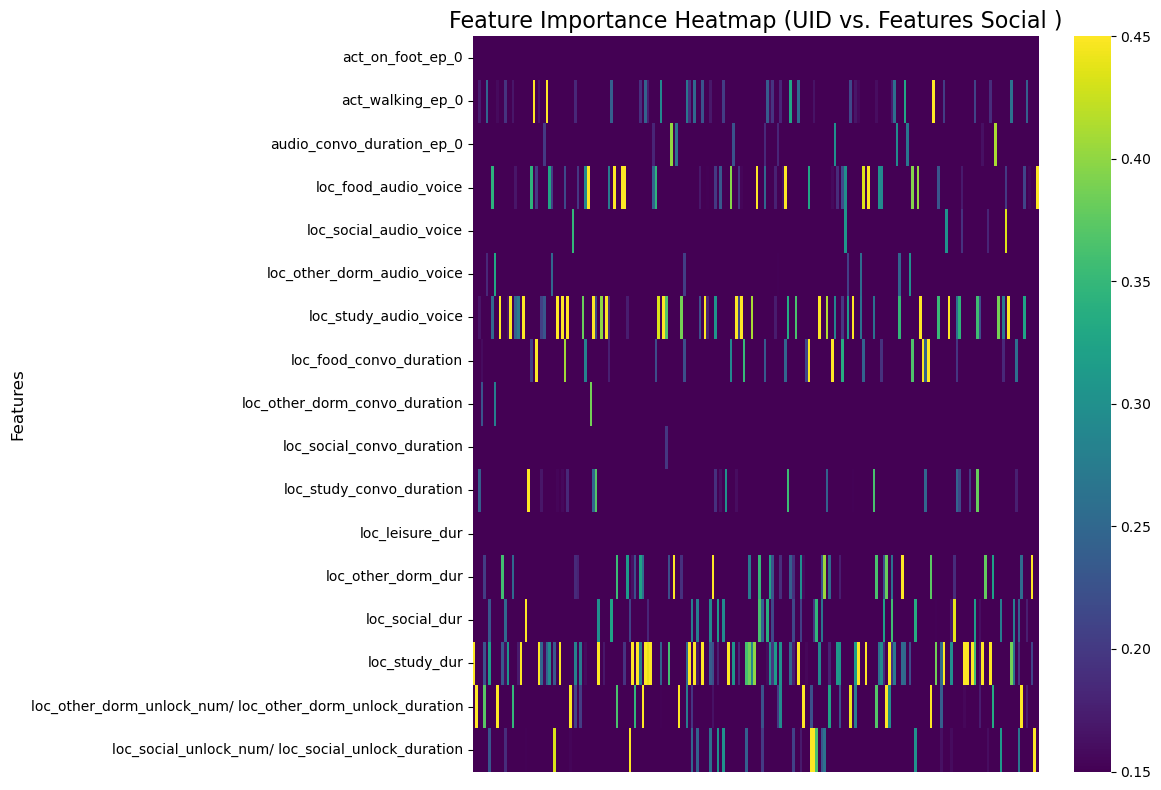

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the heatmap of feature importances
plt.figure(figsize=(12, 8))
sns.heatmap(final_feature_importances_df.set_index('UID')[features_social].transpose(), cmap='viridis', annot=False, cbar=True, vmin=0.15, vmax=0.45)
plt.title('Feature Importance Heatmap (UID vs. Features Social )', fontsize=16)
plt.ylabel('Features', fontsize=12)
plt.xlabel('')  # Remove x-axis label
plt.xticks([])  # Hide x-axis ticks
plt.tight_layout()
plt.show()

## calculate new score based on imp features

In [72]:

feature_means = final_feature_importances_df.drop(columns=['UID']).mean()

# Sort features by mean importance in descending order
sorted_features = feature_means.sort_values(ascending=False)

# Display the sorted features
print("Features sorted by mean importance (descending):")
print(sorted_features)



Features sorted by mean importance (descending):
loc_study_dur                                                0.167483
loc_study_audio_voice                                        0.108655
loc_other_dorm_dur                                           0.093344
act_walking_ep_0                                             0.091938
loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration    0.087993
loc_food_audio_voice                                         0.082402
loc_social_dur                                               0.074185
loc_social_unlock_num/ loc_social_unlock_duration            0.066950
loc_food_convo_duration                                      0.054468
loc_study_convo_duration                                     0.045472
audio_convo_duration_ep_0                                    0.034117
loc_other_dorm_audio_voice                                   0.025688
loc_social_audio_voice                                       0.023661
loc_other_dorm_convo_duration            

In [73]:
# Select the top 6 features with the highest mean importance
top_features = sorted_features.head(4)

# Create a dictionary with feature names as keys and their mean values as values
social_weight = top_features.to_dict()

# Display the dictionary
print("Social Weight Dictionary:")
print(social_weight)

Social Weight Dictionary:
{'loc_study_dur': 0.1674834507261973, 'loc_study_audio_voice': 0.1086551923828152, 'loc_other_dorm_dur': 0.09334357496242221, 'act_walking_ep_0': 0.09193792515979952}


# Combine dataset with Scores with imp features

In [74]:
#OG combined dataset
data_combined= data.copy()
data_combined

,uid,is_ios,day,act_on_bike_ep_0,act_on_foot_ep_0,act_running_ep_0,act_still_ep_0,act_walking_ep_0,audio_convo_duration_ep_0,call_in_num_ep_0,...,sleep_heathkit_dur,phq4_category,(call_in_num_ep_0+call_out_num_ep_0) /(call_in_duration_ep_0+call_out_duration_ep_0),loc_home_unlock_num/loc_home_unlock_duration,loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration,loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration,loc_social_unlock_num/ loc_social_unlock_duration,loc_study_unlock_num/loc_study_unlock_duration,sleep_end - sleep_start,unlock_num_ep_0/ unlock_duration_ep_0
0,1ff6d7f34acb354430e7323a35ff7703,1,20170907,0,0.0,7,72169,14223,4485.0,0.0,...,0.000,2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,80,0.012734
1,1ff6d7f34acb354430e7323a35ff7703,1,20170908,0,0.0,13,79532,6854,1600.0,0.0,...,8.267,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,80,0.009665
4,1ff6d7f34acb354430e7323a35ff7703,1,20170911,0,0.0,5,79730,6664,1520.0,0.0,...,8.683,1,0.0,0.457027,0.000000,0.457027,0.000000,1.376451,74,0.010696
10,1ff6d7f34acb354430e7323a35ff7703,1,20170917,0,0.0,2,80442,5955,550.0,0.0,...,8.150,1,0.0,0.576619,0.000000,0.576619,0.000000,0.000000,66,0.010701
19,1ff6d7f34acb354430e7323a35ff7703,1,20170926,0,0.0,8,81686,4705,618.0,0.0,...,8.967,1,0.0,0.551252,0.378203,0.551252,0.000000,0.463510,70,0.009566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216024,6b0083d00297f9c03e00b2cde889b666,1,20201009,0,0.0,426,60534,25439,0.0,0.0,...,7.217,0,0.0,0.572248,2.202799,0.572248,0.000000,0.000000,60,0.015106
216033,6b0083d00297f9c03e00b2cde889b666,1,20201018,0,0.0,11,71389,14999,0.0,0.0,...,6.017,0,0.0,0.573726,0.000000,0.573726,0.000000,0.956318,56,0.013715
216038,6b0083d00297f9c03e00b2cde889b666,1,20201023,0,0.0,111,68992,17069,0.0,0.0,...,0.150,0,0.0,0.344449,1.544171,0.344449,1.544171,0.805250,60,0.014716
216045,6b0083d00297f9c03e00b2cde889b666,1,20201030,0,0.0,22,75031,11346,0.0,0.0,...,0.000,0,0.0,0.575672,1.315964,0.575672,0.000000,0.976428,46,0.015091


In [75]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Identify relevant features for normalization
all_features = set(leisure_weight.keys()).union(
    me_weight.keys(),
    phone_weight.keys(),
    sleep_weight.keys(),
    social_weight.keys()
)

# Step 2: Create a scaler and fit-transform only the relevant feature columns
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(data_combined[list(all_features)])

# Step 3: Update data_combined with normalized feature values
data_combined_normalized = data_combined.copy()  # Copy to preserve original
data_combined_normalized[list(all_features)] = normalized_features  # Replace only relevant features



data_combined_normalized


,uid,is_ios,day,act_on_bike_ep_0,act_on_foot_ep_0,act_running_ep_0,act_still_ep_0,act_walking_ep_0,audio_convo_duration_ep_0,call_in_num_ep_0,...,sleep_heathkit_dur,phq4_category,(call_in_num_ep_0+call_out_num_ep_0) /(call_in_duration_ep_0+call_out_duration_ep_0),loc_home_unlock_num/loc_home_unlock_duration,loc_other_dorm_unlock_num/ loc_other_dorm_unlock_duration,loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration,loc_social_unlock_num/ loc_social_unlock_duration,loc_study_unlock_num/loc_study_unlock_duration,sleep_end - sleep_start,unlock_num_ep_0/ unlock_duration_ep_0
0,1ff6d7f34acb354430e7323a35ff7703,1,20170907,0,0.0,0.000501,0.821186,0.245924,0.059818,0.0,...,0.000,2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.421053,0.000382
1,1ff6d7f34acb354430e7323a35ff7703,1,20170908,0,0.0,0.000931,0.913709,0.118510,0.021340,0.0,...,8.267,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.421053,0.000290
4,1ff6d7f34acb354430e7323a35ff7703,1,20170911,0,0.0,0.000358,0.916198,0.115224,0.020273,0.0,...,8.683,1,0.0,0.000381,0.000000,0.000381,0.000000,0.001147,0.389474,0.000321
10,1ff6d7f34acb354430e7323a35ff7703,1,20170917,0,0.0,0.000143,0.925145,0.102965,0.007336,0.0,...,8.150,1,0.0,0.000481,0.000000,0.000481,0.000000,0.000000,0.347368,0.000321
19,1ff6d7f34acb354430e7323a35ff7703,1,20170926,0,0.0,0.000573,0.940777,0.081352,0.008242,0.0,...,8.967,1,0.0,0.000459,0.000300,0.000459,0.000000,0.000386,0.368421,0.000287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216024,6b0083d00297f9c03e00b2cde889b666,1,20201009,0,0.0,0.030500,0.674981,0.439855,0.000000,0.0,...,7.217,0,0.0,0.000477,0.001750,0.000477,0.000000,0.000000,0.315789,0.000453
216033,6b0083d00297f9c03e00b2cde889b666,1,20201018,0,0.0,0.000788,0.811385,0.259341,0.000000,0.0,...,6.017,0,0.0,0.000478,0.000000,0.000478,0.000000,0.000797,0.294737,0.000411
216038,6b0083d00297f9c03e00b2cde889b666,1,20201023,0,0.0,0.007947,0.781264,0.295133,0.000000,0.0,...,0.150,0,0.0,0.000287,0.001227,0.000287,1.544171,0.000671,0.315789,0.000441
216045,6b0083d00297f9c03e00b2cde889b666,1,20201030,0,0.0,0.001575,0.857150,0.196179,0.000000,0.0,...,0.000,0,0.0,0.000480,0.001045,0.000480,0.000000,0.000814,0.242105,0.000453


In [76]:
# Step 4: Define the scoring function
def calculate_score(row, weight_dict):
    score = 0
    for feature, imp in weight_dict.items():
        score += imp * row[feature]  # Feature importance * normalized feature value
    return score

# Step 5: Calculate scores using normalized features and store in the original DataFrame
data_combined['leisure_score'] = data_combined_normalized.apply(calculate_score, axis=1, weight_dict=leisure_weight)
data_combined['me_score'] = data_combined_normalized.apply(calculate_score, axis=1, weight_dict=me_weight)
data_combined['phone_score'] = data_combined_normalized.apply(calculate_score, axis=1, weight_dict=phone_weight)
data_combined['sleep_score'] = data_combined_normalized.apply(calculate_score, axis=1, weight_dict=sleep_weight)
data_combined['social_score'] = data_combined_normalized.apply(calculate_score, axis=1, weight_dict=social_weight)

In [77]:
data_combined

,uid,is_ios,day,act_on_bike_ep_0,act_on_foot_ep_0,act_running_ep_0,act_still_ep_0,act_walking_ep_0,audio_convo_duration_ep_0,call_in_num_ep_0,...,loc_self_dorm_unlock_num/ loc_self_dorm_unlock_duration,loc_social_unlock_num/ loc_social_unlock_duration,loc_study_unlock_num/loc_study_unlock_duration,sleep_end - sleep_start,unlock_num_ep_0/ unlock_duration_ep_0,leisure_score,me_score,phone_score,sleep_score,social_score
0,1ff6d7f34acb354430e7323a35ff7703,1,20170907,0,0.0,7,72169,14223,4485.0,0.0,...,0.000000,0.000000,0.000000,80,0.012734,0.061098,0.000000,0.000045,0.285143,0.022610
1,1ff6d7f34acb354430e7323a35ff7703,1,20170908,0,0.0,13,79532,6854,1600.0,0.0,...,0.000000,0.000000,0.000000,80,0.009665,0.028847,0.000000,0.000034,0.296500,0.010896
4,1ff6d7f34acb354430e7323a35ff7703,1,20170911,0,0.0,5,79730,6664,1520.0,0.0,...,0.457027,0.000000,1.376451,74,0.010696,0.028001,0.169921,0.000310,0.383182,0.028189
10,1ff6d7f34acb354430e7323a35ff7703,1,20170917,0,0.0,2,80442,5955,550.0,0.0,...,0.576619,0.000000,0.000000,66,0.010701,0.024048,0.190054,0.004826,0.379785,0.009466
19,1ff6d7f34acb354430e7323a35ff7703,1,20170926,0,0.0,8,81686,4705,618.0,0.0,...,0.551252,0.000000,0.463510,70,0.009566,0.019312,0.156100,0.000856,0.358766,0.064218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216024,6b0083d00297f9c03e00b2cde889b666,1,20201009,0,0.0,426,60534,25439,0.0,0.0,...,0.572248,0.000000,0.000000,60,0.015106,0.103295,0.127386,0.000238,0.299034,0.046263
216033,6b0083d00297f9c03e00b2cde889b666,1,20201018,0,0.0,11,71389,14999,0.0,0.0,...,0.573726,0.000000,0.956318,56,0.013715,0.058832,0.134587,0.000320,0.291506,0.078522
216038,6b0083d00297f9c03e00b2cde889b666,1,20201023,0,0.0,111,68992,17069,0.0,0.0,...,0.344449,1.544171,0.805250,60,0.014716,0.067838,0.124795,0.000236,0.299749,0.063838
216045,6b0083d00297f9c03e00b2cde889b666,1,20201030,0,0.0,22,75031,11346,0.0,0.0,...,0.575672,0.000000,0.976428,46,0.015091,0.044722,0.092140,0.000327,0.256766,0.075514


In [78]:
data_combined.columns

Index(['uid', 'is_ios', 'day', 'act_on_bike_ep_0', 'act_on_foot_ep_0',
       'act_running_ep_0', 'act_still_ep_0', 'act_walking_ep_0',
       'audio_convo_duration_ep_0', 'call_in_num_ep_0', 'call_out_num_ep_0',
       'call_in_duration_ep_0', 'call_out_duration_ep_0',
       'loc_food_audio_voice', 'loc_home_audio_voice',
       'loc_social_audio_voice', 'loc_other_dorm_audio_voice',
       'loc_self_dorm_audio_voice', 'loc_study_audio_voice',
       'loc_food_convo_duration', 'loc_home_convo_duration',
       'loc_other_dorm_convo_duration', 'loc_social_convo_duration',
       'loc_study_convo_duration', 'loc_self_dorm_convo_duration',
       'loc_home_dur', 'loc_leisure_dur', 'loc_other_dorm_dur',
       'loc_self_dorm_dur', 'loc_social_dur', 'loc_study_dur',
       'loc_workout_dur', 'loc_home_unlock_num', 'loc_home_unlock_duration',
       'loc_other_dorm_unlock_num', 'loc_other_dorm_unlock_duration',
       'loc_self_dorm_unlock_num', 'loc_self_dorm_unlock_duration',
       'loc

In [79]:
df2=data_combined[['uid','leisure_score','me_score','phone_score','sleep_score','social_score','phq4_category']]
df2

,uid,leisure_score,me_score,phone_score,sleep_score,social_score,phq4_category
0,1ff6d7f34acb354430e7323a35ff7703,0.061098,0.000000,0.000045,0.285143,0.022610,2
1,1ff6d7f34acb354430e7323a35ff7703,0.028847,0.000000,0.000034,0.296500,0.010896,1
4,1ff6d7f34acb354430e7323a35ff7703,0.028001,0.169921,0.000310,0.383182,0.028189,1
10,1ff6d7f34acb354430e7323a35ff7703,0.024048,0.190054,0.004826,0.379785,0.009466,1
19,1ff6d7f34acb354430e7323a35ff7703,0.019312,0.156100,0.000856,0.358766,0.064218,1
...,...,...,...,...,...,...,...
216024,6b0083d00297f9c03e00b2cde889b666,0.103295,0.127386,0.000238,0.299034,0.046263,0
216033,6b0083d00297f9c03e00b2cde889b666,0.058832,0.134587,0.000320,0.291506,0.078522,0
216038,6b0083d00297f9c03e00b2cde889b666,0.067838,0.124795,0.000236,0.299749,0.063838,0
216045,6b0083d00297f9c03e00b2cde889b666,0.044722,0.092140,0.000327,0.256766,0.075514,0


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Define the columns and their respective conditions
feature = ['leisure_score','me_score','phone_score','sleep_score','social_score']
# df2_copy

# Initialize a list to store feature importance data for all UIDs
final_feature_importances = []

# Group by 'uid'
for uid, group in df2.groupby('uid'):
    print(f"Processing UID: {uid}, Rows in Group: {group.shape[0]}")
    

    # Use a Random Forest model to assess feature importance
    X = group[feature]
    y = group['phq4_category']

    # Train a model
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)

    # Extract feature importances and add UID
    importance_row = {feature: model.feature_importances_[idx] for idx, feature in enumerate(feature)}
    importance_row['UID'] = uid

    # Append the row to the final list
    final_feature_importances.append(importance_row)

# Create a DataFrame with UIDs as rows and features as columns
final_feature_importances_df = pd.DataFrame(final_feature_importances)

# Verify the DataFrame has the correct number of rows
print(f"Total Unique UIDs Processed: {len(final_feature_importances_df['UID'].unique())}")
print(f"Shape of Feature Importance DataFrame: {final_feature_importances_df.shape}")

Processing UID: 003df5deff30e1e5a07b5d063fe85c3f, Rows in Group: 152
Processing UID: 0107c61e54459068bb83f6be2058d65d, Rows in Group: 190
Processing UID: 01fb41df0f6c2f69d65db5a38c600b4c, Rows in Group: 13
Processing UID: 031cf9537e5da78c5a69a10cba088c94, Rows in Group: 97
Processing UID: 03a0ce5623bfeb8aa3113605f7682215, Rows in Group: 180
Processing UID: 07eab8e219b6a4dcd45167dc216e1189, Rows in Group: 13
Processing UID: 0947cdc8e87a0a45a012aa387ccedbcd, Rows in Group: 186
Processing UID: 0ab7acb36e6c710a7733c1c24e566bb3, Rows in Group: 180
Processing UID: 0aee9faa6f2d2d24d85d2690f5b2df25, Rows in Group: 85
Processing UID: 0b9c2303bcc61063f9a5653d77c90501, Rows in Group: 74
Processing UID: 0ba15aa0582c5e825710d42fe3eb231d, Rows in Group: 208
Processing UID: 0f2be96bde481cd3898f147a995a7d56, Rows in Group: 124
Processing UID: 0f727c1018c74fbb7142e8c7a77840d6, Rows in Group: 210
Processing UID: 107c06248d28377b345ae06e5bda10c1, Rows in Group: 197
Processing UID: 12e0a85ee9819ae1abeca0c

In [ ]:
# Verify the DataFrame has the correct number of rows
print(f"Total Unique UIDs Processed: {len(final_feature_importances_df['UID'].unique())}")
print(f"Shape of Feature Importance DataFrame: {final_feature_importances_df.shape}")

Total Unique UIDs Processed: 218
Shape of Feature Importance DataFrame: (218, 6)


In [ ]:
final_feature_importances_df

,leisure_score,me_score,phone_score,sleep_score,social_score,UID
0,0.192997,0.007209,0.118042,0.377696,0.304056,003df5deff30e1e5a07b5d063fe85c3f
1,0.174282,0.074765,0.364833,0.237733,0.148387,0107c61e54459068bb83f6be2058d65d
2,0.000000,0.000000,0.000000,0.000000,0.000000,01fb41df0f6c2f69d65db5a38c600b4c
3,0.252039,0.106558,0.268345,0.220795,0.152262,031cf9537e5da78c5a69a10cba088c94
4,0.257539,0.077149,0.255847,0.253300,0.156165,03a0ce5623bfeb8aa3113605f7682215
...,...,...,...,...,...,...
213,0.549451,0.010989,0.131868,0.131868,0.175824,fbcc8cd8254960ed44ffdd3390a2f6a0
214,0.256537,0.070913,0.319427,0.297013,0.056110,fc26652471ae91bdbbc11a8be89c362c
215,0.172139,0.067179,0.259012,0.265932,0.235738,fc73375dda5e5460f7088c78654a945e
216,0.247802,0.050217,0.238912,0.245529,0.217540,fe8ddda4ae8c71f7054ca024b82f5c98


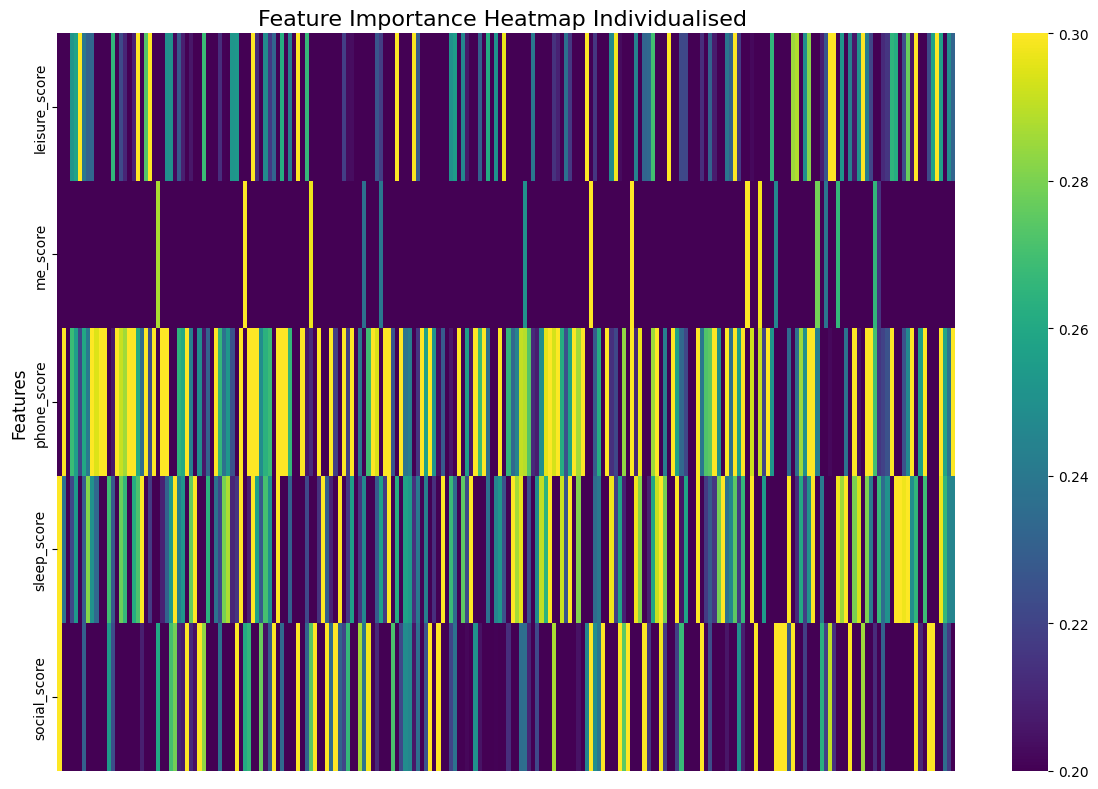

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the heatmap of feature importances
plt.figure(figsize=(12, 8))
sns.heatmap(final_feature_importances_df.set_index('UID')[feature].transpose(), cmap='viridis', annot=False, cbar=True, vmin=0.2, vmax=0.3)
plt.title('Feature Importance Heatmap Individualised ', fontsize=16)
plt.ylabel('Features', fontsize=12)
plt.xlabel('')  # Remove x-axis label
plt.xticks([])  # Hide x-axis ticks
plt.tight_layout()
plt.show()


## calculate new score based on imp features

In [ ]:

feature_means = final_feature_importances_df.drop(columns=['UID']).mean()

# Sort features by mean importance in descending order
sorted_features = feature_means.sort_values(ascending=False)

# Display the sorted features
print("Features sorted by mean importance (descending):")
print(sorted_features)



Features sorted by mean importance (descending):
phone_score      0.256358
sleep_score      0.223312
leisure_score    0.195863
social_score     0.194736
me_score         0.093034
dtype: float64


In [ ]:
# Select the top 6 features with the highest mean importance
top_features = sorted_features

# Create a dictionary with feature names as keys and their mean values as values
feature_weights = top_features.to_dict()

# Display the dictionary
print("Weight Dictionary:")
print(feature_weights)

Weight Dictionary:
{'phone_score': 0.2563578737125821, 'sleep_score': 0.223311872619486, 'leisure_score': 0.19586335453760065, 'social_score': 0.19473558070920405, 'me_score': 0.09303407071470508}


# Train

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input

# Define the features and target
features = ['phone_score', 'sleep_score', 'leisure_score', 'social_score', 'me_score']
target = 'phq4_category'

In [ ]:

# Group data by UID
uids = final_feature_importances_df['UID'].unique()

In [ ]:



# Create a dictionary to store models for each UID
uid_models = {}
results = []  # To store evaluation results for each UID

# Iterate through each UID to build unique models
for uid in uids:
    print(f"Building model for UID: {uid}")
    
    # Step 1: Extract data for this UID
    uid_data = df2[df2['uid'] == uid]
    if uid_data.empty:
        print(f"No data for UID: {uid}, skipping...")
        continue

    X = uid_data[features]
    y = uid_data[target]
    
    # Step 2: Get feature importance weights for this UID
    uid_feature_importances = final_feature_importances_df[final_feature_importances_df['UID'] == uid]
    if uid_feature_importances.empty:
        print(f"No feature importances for UID: {uid}, skipping...")
        continue
    feature_weights = uid_feature_importances[features].iloc[0].to_dict()
    
    # Step 3: Apply feature weights to the data
    for feature, weight in feature_weights.items():
        X.loc[:, feature] *= weight
    
    # Step 4: Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    try:
    # Step 5: Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    except:
        continue

    
    # Step 6: Convert target to one-hot encoding
    # y_train_onehot = to_categorical(y_train)
    # y_test_onehot = to_categorical(y_test)
    y_train_onehot = to_categorical(y_train, num_classes=4)
    y_test_onehot = to_categorical(y_test, num_classes=4)

    
    # Step 7: Build the Neural Network
    model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Specify the input shape
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')  # Output layer
])
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    try:
    
        # Step 8: Train the model
        model.fit(X_train, y_train_onehot,
                validation_data=(X_test, y_test_onehot),
                epochs=50, 
                batch_size=32,
                verbose=1)  # Set verbose=1 to see training progress
    except:
        continue
    
    # Step 9: Save the model for this UID
    uid_models[uid] = model
    
    # Evaluate the model for this UID
    test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot, verbose=0)
    print(f"UID: {uid}, Test Accuracy: {test_accuracy:.2f}")
    train_loss, train_accuracy = model.evaluate(X_train, y_train_onehot, verbose=0)
    print(f"UID: {uid}, Train Accuracy: {test_accuracy:.2f}")
    print('-------------------------------------------------------')
    
    # Step 10: Append results to the list
    results.append({
        'UID': uid,
        'Test Loss': test_loss,
        'Test Accuracy': test_accuracy,
        'Train Loss': train_loss,
        'Train Accuracy': train_accuracy
    })

# Step 11: Convert results into a DataFrame
results_df = pd.DataFrame(results)




Building model for UID: 003df5deff30e1e5a07b5d063fe85c3f
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0278 - loss: 1.4985 - val_accuracy: 0.0000e+00 - val_loss: 1.4964
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1096 - loss: 1.4236 - val_accuracy: 0.0968 - val_loss: 1.4167
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2311 - loss: 1.3794 - val_accuracy: 0.3226 - val_loss: 1.3437
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4810 - loss: 1.3205 - val_accuracy: 0.5161 - val_loss: 1.2778
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6407 - loss: 1.2799 - val_accuracy: 0.5806 - val_loss: 1.2168
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7614 - loss: 1.2274 - val_accuracy: 0.7419 - val_loss: 1.1612
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8308 - loss: 1.1728 - val_accuracy: 0.8065 - val_loss: 1.1093
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8891 - l

In [ ]:
results_df1

,UID,Test Loss,Test Accuracy,Train Loss,Train Accuracy
0,003df5deff30e1e5a07b5d063fe85c3f,0.184110,0.935484,0.266982,0.909091
2,01fb41df0f6c2f69d65db5a38c600b4c,1.312474,1.000000,1.312474,1.000000
7,0ab7acb36e6c710a7733c1c24e566bb3,0.608913,0.805556,0.347456,0.881944
11,0f2be96bde481cd3898f147a995a7d56,0.027844,1.000000,0.076260,0.989899
14,12e0a85ee9819ae1abeca0ccfaa52d13,0.104096,1.000000,0.320619,0.913793
...,...,...,...,...,...
204,f40ed30e72159a5c839a43fe97e0c905,0.447448,0.838710,0.297807,0.883065
207,f578948fdf09c92bc603dae7400b6673,0.247332,0.925926,0.144662,0.962963
211,fa394f6d3d077bd5568fc3bc01580806,0.321826,0.937500,0.200934,0.928000
214,fc73375dda5e5460f7088c78654a945e,0.349102,0.900000,0.287320,0.908163


In [ ]:
mean_train_accuracy = results_df1['Test Accuracy'].mean()
mean_train_accuracy 

np.float64(0.9172531802479814)